from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Multivariate/pHA')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-15 05:33:19.907191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 05:33:20.942754: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 05:33:20.970974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-15 05:33:20.971003: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Data Format

In [2]:
data = pd.read_csv("data/LocationB.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempB,pHB,ECB,DOB,BODB,TNB
0,21.20,8.12,1679,2.62,27.70,1.25
1,21.10,8.08,1690,2.68,27.62,1.20
2,20.94,8.06,1680,2.67,27.25,1.24
3,20.94,8.09,1697,2.65,27.32,1.22
4,21.19,8.11,1692,2.69,27.32,1.18


In [3]:
target_column = "pHB"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [4]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [5]:
X[0], y[0]

(array([2.120e+01, 1.679e+03, 2.620e+00, 2.770e+01, 1.250e+00, 2.110e+01,
        1.690e+03, 2.680e+00, 2.762e+01, 1.200e+00, 2.094e+01, 1.680e+03,
        2.670e+00, 2.725e+01, 1.240e+00]),
 8.09)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [7]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [9]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [10]:
epochs = 50

# General Model

### CNN

In [11]:
x_train = xt.copy()

2024-03-15 05:33:33.131774: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:33:33.131826: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:33:33.131855: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:33:33.132209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 27232.9180 - root_mean_squared_error: 165.0240 

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 8s 730ms/step - loss: 27232.9180 - root_mean_squared_error: 165.0240 - val_loss: 12723.2812 - val_root_mean_squared_error: 112.7975
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 6690.7944 - root_mean_squared_error: 81.7973  

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 465ms/step - loss: 6516.4189 - root_mean_squared_error: 80.7243 - val_loss: 467.3407 - val_root_mean_squared_error: 21.6181
Epoch 3/50
8/8 [==============================] - 0s 30ms/step - loss: 326.7169 - root_mean_squared_error: 18.0753 - val_loss: 1145.5707 - val_root_mean_squared_error: 33.8463
Epoch 4/50
8/8 [==============================] - 0s 52ms/step - loss: 1377.6842 - root_mean_squared_error: 37.1172 - val_loss: 1012.0808 - val_root_mean_squared_error: 31.8132
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 564.2811 - root_mean_squared_error: 23.7546

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 675ms/step - loss: 548.6249 - root_mean_squared_error: 23.4227 - val_loss: 41.6304 - val_root_mean_squared_error: 6.4522
Epoch 6/50
8/8 [==============================] - 0s 44ms/step - loss: 84.3761 - root_mean_squared_error: 9.1856 - val_loss: 147.5873 - val_root_mean_squared_error: 12.1486
Epoch 7/50
8/8 [==============================] - 0s 41ms/step - loss: 180.9179 - root_mean_squared_error: 13.4506 - val_loss: 76.8076 - val_root_mean_squared_error: 8.7640
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 66.4584 - root_mean_squared_error: 8.1522

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 565ms/step - loss: 66.4584 - root_mean_squared_error: 8.1522 - val_loss: 23.6349 - val_root_mean_squared_error: 4.8616
Epoch 9/50
8/8 [==============================] - 0s 39ms/step - loss: 61.0930 - root_mean_squared_error: 7.8162 - val_loss: 40.7942 - val_root_mean_squared_error: 6.3870
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 55.7722 - root_mean_squared_error: 7.4681

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 667ms/step - loss: 54.2927 - root_mean_squared_error: 7.3684 - val_loss: 19.2103 - val_root_mean_squared_error: 4.3830
Epoch 11/50
8/8 [==============================] - 0s 66ms/step - loss: 48.2635 - root_mean_squared_error: 6.9472 - val_loss: 22.2208 - val_root_mean_squared_error: 4.7139
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 47.0208 - root_mean_squared_error: 6.8572

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 713ms/step - loss: 48.5194 - root_mean_squared_error: 6.9656 - val_loss: 19.0374 - val_root_mean_squared_error: 4.3632
Epoch 13/50
8/8 [==============================] - 0s 32ms/step - loss: 45.9437 - root_mean_squared_error: 6.7782 - val_loss: 20.0989 - val_root_mean_squared_error: 4.4832
Epoch 14/50
8/8 [==============================] - 0s 66ms/step - loss: 46.4339 - root_mean_squared_error: 6.8142 - val_loss: 19.5449 - val_root_mean_squared_error: 4.4210
Epoch 15/50
8/8 [==============================] - 0s 24ms/step - loss: 46.4836 - root_mean_squared_error: 6.8179 - val_loss: 19.2268 - val_root_mean_squared_error: 4.3848
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 46.4624 - root_mean_squared_error: 6.8163

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 6s 800ms/step - loss: 46.4624 - root_mean_squared_error: 6.8163 - val_loss: 18.8626 - val_root_mean_squared_error: 4.3431
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 50.9376 - root_mean_squared_error: 7.1371

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 441ms/step - loss: 45.1844 - root_mean_squared_error: 6.7219 - val_loss: 18.8423 - val_root_mean_squared_error: 4.3408
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 45.0785 - root_mean_squared_error: 6.7141

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 572ms/step - loss: 45.0785 - root_mean_squared_error: 6.7141 - val_loss: 18.8038 - val_root_mean_squared_error: 4.3363
Epoch 19/50
8/8 [==============================] - 0s 30ms/step - loss: 45.2681 - root_mean_squared_error: 6.7282 - val_loss: 19.2160 - val_root_mean_squared_error: 4.3836
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 46.2424 - root_mean_squared_error: 6.8002

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 625ms/step - loss: 44.6680 - root_mean_squared_error: 6.6834 - val_loss: 18.5575 - val_root_mean_squared_error: 4.3078
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 29.4062 - root_mean_squared_error: 5.4227

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 531ms/step - loss: 44.8329 - root_mean_squared_error: 6.6957 - val_loss: 18.5485 - val_root_mean_squared_error: 4.3068
Epoch 22/50
8/8 [==============================] - 0s 37ms/step - loss: 44.6605 - root_mean_squared_error: 6.6828 - val_loss: 19.7354 - val_root_mean_squared_error: 4.4425
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 44.6688 - root_mean_squared_error: 6.6835

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 44.3269 - root_mean_squared_error: 6.6578 - val_loss: 18.3262 - val_root_mean_squared_error: 4.2809
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 44.4385 - root_mean_squared_error: 6.6662

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 440ms/step - loss: 44.4385 - root_mean_squared_error: 6.6662 - val_loss: 18.2571 - val_root_mean_squared_error: 4.2728
Epoch 25/50
8/8 [==============================] - 0s 46ms/step - loss: 44.1671 - root_mean_squared_error: 6.6458 - val_loss: 18.6203 - val_root_mean_squared_error: 4.3151
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 69.5149 - root_mean_squared_error: 8.3376

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 494ms/step - loss: 43.9010 - root_mean_squared_error: 6.6258 - val_loss: 18.1428 - val_root_mean_squared_error: 4.2594
Epoch 27/50
8/8 [==============================] - 0s 27ms/step - loss: 43.5442 - root_mean_squared_error: 6.5988 - val_loss: 18.1849 - val_root_mean_squared_error: 4.2644
Epoch 28/50
1/8 [==>...........................] - ETA: 0s - loss: 48.2820 - root_mean_squared_error: 6.9485

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 374ms/step - loss: 43.2278 - root_mean_squared_error: 6.5748 - val_loss: 17.9724 - val_root_mean_squared_error: 4.2394
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 43.1697 - root_mean_squared_error: 6.5704

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 363ms/step - loss: 43.1697 - root_mean_squared_error: 6.5704 - val_loss: 17.9136 - val_root_mean_squared_error: 4.2324
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 46.6914 - root_mean_squared_error: 6.8331

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 597ms/step - loss: 43.1102 - root_mean_squared_error: 6.5658 - val_loss: 17.8222 - val_root_mean_squared_error: 4.2216
Epoch 31/50
8/8 [==============================] - 0s 62ms/step - loss: 42.6268 - root_mean_squared_error: 6.5289 - val_loss: 17.9215 - val_root_mean_squared_error: 4.2334
Epoch 32/50
8/8 [==============================] - 0s 53ms/step - loss: 42.8389 - root_mean_squared_error: 6.5451 - val_loss: 17.9229 - val_root_mean_squared_error: 4.2335
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 38.5908 - root_mean_squared_error: 6.2121

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 480ms/step - loss: 42.2620 - root_mean_squared_error: 6.5009 - val_loss: 17.6193 - val_root_mean_squared_error: 4.1975
Epoch 34/50
8/8 [==============================] - 0s 30ms/step - loss: 42.3642 - root_mean_squared_error: 6.5088 - val_loss: 18.4269 - val_root_mean_squared_error: 4.2927
Epoch 35/50
4/8 [==============>...............] - ETA: 0s - loss: 49.9732 - root_mean_squared_error: 7.0692

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 466ms/step - loss: 42.2367 - root_mean_squared_error: 6.4990 - val_loss: 17.4299 - val_root_mean_squared_error: 4.1749
Epoch 36/50
8/8 [==============================] - 0s 31ms/step - loss: 42.5348 - root_mean_squared_error: 6.5219 - val_loss: 17.5501 - val_root_mean_squared_error: 4.1893
Epoch 37/50
8/8 [==============================] - 0s 31ms/step - loss: 41.6477 - root_mean_squared_error: 6.4535 - val_loss: 17.4333 - val_root_mean_squared_error: 4.1753
Epoch 38/50
8/8 [==============================] - 0s 15ms/step - loss: 41.4346 - root_mean_squared_error: 6.4370 - val_loss: 17.7502 - val_root_mean_squared_error: 4.2131
Epoch 39/50
8/8 [==============================] - 0s 30ms/step - loss: 45.0171 - root_mean_squared_error: 6.7095 - val_loss: 18.8100 - val_root_mean_squared_error: 4.3371
Epoch 40/50
8/8 [==============================] - 0s 24ms/step - loss: 45.2019 - root_mean_squared_error: 6.7232 - val_loss: 18.6167 - val_root_mean_s

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 565ms/step - loss: 42.2706 - root_mean_squared_error: 6.5016 - val_loss: 17.3570 - val_root_mean_squared_error: 4.1662
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 61.0407 - root_mean_squared_error: 7.8129

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 7s 988ms/step - loss: 40.7482 - root_mean_squared_error: 6.3834 - val_loss: 17.1574 - val_root_mean_squared_error: 4.1421
Epoch 44/50
8/8 [==============================] - 0s 41ms/step - loss: 39.6323 - root_mean_squared_error: 6.2954 - val_loss: 18.1968 - val_root_mean_squared_error: 4.2658
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 37.4510 - root_mean_squared_error: 6.1197

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 40.7227 - root_mean_squared_error: 6.3814 - val_loss: 16.9938 - val_root_mean_squared_error: 4.1224
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 40.4716 - root_mean_squared_error: 6.3617

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 547ms/step - loss: 39.4463 - root_mean_squared_error: 6.2806 - val_loss: 16.4797 - val_root_mean_squared_error: 4.0595
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 39.5822 - root_mean_squared_error: 6.2914

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 527ms/step - loss: 39.3331 - root_mean_squared_error: 6.2716 - val_loss: 16.3608 - val_root_mean_squared_error: 4.0449
Epoch 48/50
8/8 [==============================] - 0s 35ms/step - loss: 39.0367 - root_mean_squared_error: 6.2479 - val_loss: 16.3752 - val_root_mean_squared_error: 4.0466
Epoch 49/50
1/8 [==>...........................] - ETA: 0s - loss: 24.8438 - root_mean_squared_error: 4.9844

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 477ms/step - loss: 38.7667 - root_mean_squared_error: 6.2263 - val_loss: 16.1907 - val_root_mean_squared_error: 4.0238
Epoch 50/50
8/8 [==============================] - 1s 6ms/step


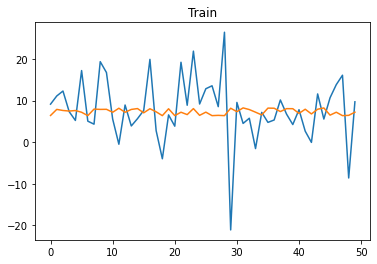

2/2 [==============================] - 0s 5ms/step


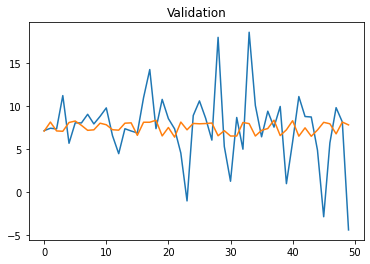

3/3 [==============================] - 0s 3ms/step


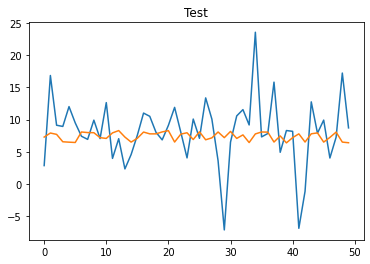

3/3 [==============================] - 0s 3ms/step


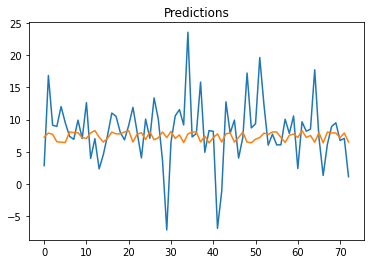

In [12]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 68.3067 - root_mean_squared_error: 8.2648

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 33s 3s/step - loss: 68.1526 - root_mean_squared_error: 8.2555 - val_loss: 65.3394 - val_root_mean_squared_error: 8.0833
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 65.0457 - root_mean_squared_error: 8.0651

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 64.8369 - root_mean_squared_error: 8.0521 - val_loss: 62.1046 - val_root_mean_squared_error: 7.8807
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 61.6091 - root_mean_squared_error: 7.8491

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 61.6091 - root_mean_squared_error: 7.8491 - val_loss: 58.9693 - val_root_mean_squared_error: 7.6791
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 58.4755 - root_mean_squared_error: 7.6469

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 58.4755 - root_mean_squared_error: 7.6469 - val_loss: 55.9166 - val_root_mean_squared_error: 7.4777
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 55.4341 - root_mean_squared_error: 7.4454

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 55.4341 - root_mean_squared_error: 7.4454 - val_loss: 52.9425 - val_root_mean_squared_error: 7.2762
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 52.0430 - root_mean_squared_error: 7.2141

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 52.4654 - root_mean_squared_error: 7.2433 - val_loss: 50.0573 - val_root_mean_squared_error: 7.0751
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 50.0833 - root_mean_squared_error: 7.0770

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 49.5800 - root_mean_squared_error: 7.0413 - val_loss: 47.2332 - val_root_mean_squared_error: 6.8726
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 46.7573 - root_mean_squared_error: 6.8379

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 46.7573 - root_mean_squared_error: 6.8379 - val_loss: 44.4600 - val_root_mean_squared_error: 6.6678
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 43.9671 - root_mean_squared_error: 6.6308

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 43.9855 - root_mean_squared_error: 6.6322 - val_loss: 41.7557 - val_root_mean_squared_error: 6.4619
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 41.2652 - root_mean_squared_error: 6.4238

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 41.2652 - root_mean_squared_error: 6.4238 - val_loss: 39.0863 - val_root_mean_squared_error: 6.2519
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 38.5956 - root_mean_squared_error: 6.2125

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 38.6176 - root_mean_squared_error: 6.2143 - val_loss: 36.5456 - val_root_mean_squared_error: 6.0453
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 36.1004 - root_mean_squared_error: 6.0084

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 36.1004 - root_mean_squared_error: 6.0084 - val_loss: 34.0951 - val_root_mean_squared_error: 5.8391
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 33.6601 - root_mean_squared_error: 5.8017

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 33.6601 - root_mean_squared_error: 5.8017 - val_loss: 31.7115 - val_root_mean_squared_error: 5.6313
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 31.2864 - root_mean_squared_error: 5.5934

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 31.2864 - root_mean_squared_error: 5.5934 - val_loss: 29.4037 - val_root_mean_squared_error: 5.4225
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 29.0545 - root_mean_squared_error: 5.3902

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 28.9893 - root_mean_squared_error: 5.3842 - val_loss: 27.1581 - val_root_mean_squared_error: 5.2113
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 26.6214 - root_mean_squared_error: 5.1596

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 26.7447 - root_mean_squared_error: 5.1715 - val_loss: 24.9925 - val_root_mean_squared_error: 4.9993
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 24.6767 - root_mean_squared_error: 4.9676

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 24.5892 - root_mean_squared_error: 4.9587 - val_loss: 22.8944 - val_root_mean_squared_error: 4.7848
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 22.5067 - root_mean_squared_error: 4.7441

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 22.5067 - root_mean_squared_error: 4.7441 - val_loss: 20.8891 - val_root_mean_squared_error: 4.5705
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 20.5195 - root_mean_squared_error: 4.5298

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 20.5195 - root_mean_squared_error: 4.5298 - val_loss: 18.9696 - val_root_mean_squared_error: 4.3554
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 18.6846 - root_mean_squared_error: 4.3226

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 18.6266 - root_mean_squared_error: 4.3159 - val_loss: 17.1428 - val_root_mean_squared_error: 4.1404
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 16.8151 - root_mean_squared_error: 4.1006

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 16.8172 - root_mean_squared_error: 4.1009 - val_loss: 15.4239 - val_root_mean_squared_error: 3.9273
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 15.0540 - root_mean_squared_error: 3.8799

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 28s 4s/step - loss: 15.1201 - root_mean_squared_error: 3.8885 - val_loss: 13.8062 - val_root_mean_squared_error: 3.7157
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 13.5254 - root_mean_squared_error: 3.6777

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 13.5254 - root_mean_squared_error: 3.6777 - val_loss: 12.2931 - val_root_mean_squared_error: 3.5062
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 12.2440 - root_mean_squared_error: 3.4991

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 12.0432 - root_mean_squared_error: 3.4703 - val_loss: 10.8946 - val_root_mean_squared_error: 3.3007
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 11.0136 - root_mean_squared_error: 3.3187

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 10.6782 - root_mean_squared_error: 3.2678 - val_loss: 9.6168 - val_root_mean_squared_error: 3.1011
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 9.4316 - root_mean_squared_error: 3.0711

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 9.4316 - root_mean_squared_error: 3.0711 - val_loss: 8.4516 - val_root_mean_squared_error: 2.9072
Epoch 27/50
4/8 [==============>...............] - ETA: 0s - loss: 8.5363 - root_mean_squared_error: 2.9217

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 8.2940 - root_mean_squared_error: 2.8799 - val_loss: 7.4040 - val_root_mean_squared_error: 2.7210
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 7.2687 - root_mean_squared_error: 2.6961

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 7.2713 - root_mean_squared_error: 2.6965 - val_loss: 6.4697 - val_root_mean_squared_error: 2.5436
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 6.3598 - root_mean_squared_error: 2.5219

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 6.3598 - root_mean_squared_error: 2.5219 - val_loss: 5.6338 - val_root_mean_squared_error: 2.3736
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 5.5211 - root_mean_squared_error: 2.3497

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 5.5497 - root_mean_squared_error: 2.3558 - val_loss: 4.8882 - val_root_mean_squared_error: 2.2109
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 4.8008 - root_mean_squared_error: 2.1911

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 4.8257 - root_mean_squared_error: 2.1968 - val_loss: 4.2378 - val_root_mean_squared_error: 2.0586
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 4.2234 - root_mean_squared_error: 2.0551

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 4.1932 - root_mean_squared_error: 2.0477 - val_loss: 3.6640 - val_root_mean_squared_error: 1.9142
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 3.6296 - root_mean_squared_error: 1.9052

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 27s 4s/step - loss: 3.6296 - root_mean_squared_error: 1.9052 - val_loss: 3.1298 - val_root_mean_squared_error: 1.7691
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 3.1222 - root_mean_squared_error: 1.7670

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 3.1222 - root_mean_squared_error: 1.7670 - val_loss: 2.7071 - val_root_mean_squared_error: 1.6453
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2.7433 - root_mean_squared_error: 1.6563

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2.7149 - root_mean_squared_error: 1.6477 - val_loss: 2.3493 - val_root_mean_squared_error: 1.5328
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2.3695 - root_mean_squared_error: 1.5393

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2.3695 - root_mean_squared_error: 1.5393 - val_loss: 2.0460 - val_root_mean_squared_error: 1.4304
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2.0551 - root_mean_squared_error: 1.4336

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2.0702 - root_mean_squared_error: 1.4388 - val_loss: 1.7859 - val_root_mean_squared_error: 1.3364
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 1.8172 - root_mean_squared_error: 1.3480

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 1.8172 - root_mean_squared_error: 1.3480 - val_loss: 1.5614 - val_root_mean_squared_error: 1.2496
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 1.5973 - root_mean_squared_error: 1.2638

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.5973 - root_mean_squared_error: 1.2638 - val_loss: 1.3725 - val_root_mean_squared_error: 1.1716
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 1.4659 - root_mean_squared_error: 1.2108

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 1.4115 - root_mean_squared_error: 1.1881 - val_loss: 1.2129 - val_root_mean_squared_error: 1.1013
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 1.2546 - root_mean_squared_error: 1.1201

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1.2546 - root_mean_squared_error: 1.1201 - val_loss: 1.0811 - val_root_mean_squared_error: 1.0397
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 1.1144 - root_mean_squared_error: 1.0556

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 1.1223 - root_mean_squared_error: 1.0594 - val_loss: 0.9689 - val_root_mean_squared_error: 0.9843
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0439 - root_mean_squared_error: 1.0217

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 1.0117 - root_mean_squared_error: 1.0058 - val_loss: 0.8704 - val_root_mean_squared_error: 0.9329
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 0.9095 - root_mean_squared_error: 0.9537

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.9095 - root_mean_squared_error: 0.9537 - val_loss: 0.7897 - val_root_mean_squared_error: 0.8886
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8269 - root_mean_squared_error: 0.9093

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.8287 - root_mean_squared_error: 0.9104 - val_loss: 0.7193 - val_root_mean_squared_error: 0.8481
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.7541 - root_mean_squared_error: 0.8684

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.7541 - root_mean_squared_error: 0.8684 - val_loss: 0.6615 - val_root_mean_squared_error: 0.8133
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.6957 - root_mean_squared_error: 0.8341

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.6957 - root_mean_squared_error: 0.8341 - val_loss: 0.6112 - val_root_mean_squared_error: 0.7818
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.6444 - root_mean_squared_error: 0.8028

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.6444 - root_mean_squared_error: 0.8028 - val_loss: 0.5688 - val_root_mean_squared_error: 0.7542
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.6009 - root_mean_squared_error: 0.7752

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.6009 - root_mean_squared_error: 0.7752 - val_loss: 0.5352 - val_root_mean_squared_error: 0.7316
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.5654 - root_mean_squared_error: 0.7520

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 3s 5ms/step


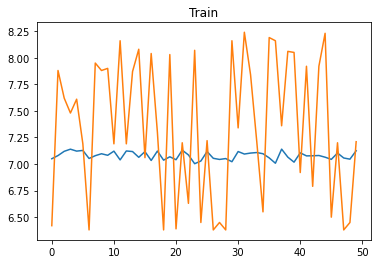

2/2 [==============================] - 3s 10ms/step


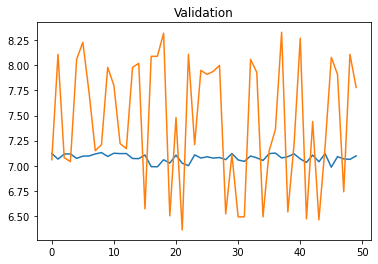

3/3 [==============================] - 0s 16ms/step


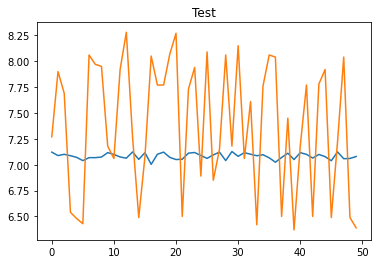

3/3 [==============================] - 0s 8ms/step


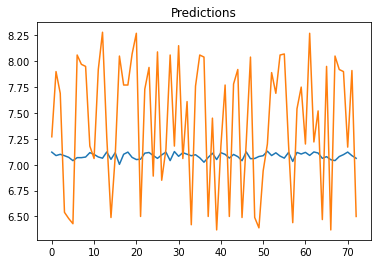

In [13]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 57.3718 - root_mean_squared_error: 7.5744

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 42s 4s/step - loss: 57.3718 - root_mean_squared_error: 7.5744 - val_loss: 55.6103 - val_root_mean_squared_error: 7.4572
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 55.8803 - root_mean_squared_error: 7.4753

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 55.8803 - root_mean_squared_error: 7.4753 - val_loss: 54.1622 - val_root_mean_squared_error: 7.3595
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 54.3296 - root_mean_squared_error: 7.3709

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 54.4290 - root_mean_squared_error: 7.3776 - val_loss: 52.7503 - val_root_mean_squared_error: 7.2629
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 53.0254 - root_mean_squared_error: 7.2819

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 53.0134 - root_mean_squared_error: 7.2810 - val_loss: 51.3633 - val_root_mean_squared_error: 7.1668
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 51.6673 - root_mean_squared_error: 7.1880

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 51.6200 - root_mean_squared_error: 7.1847 - val_loss: 49.9849 - val_root_mean_squared_error: 7.0700
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 50.2109 - root_mean_squared_error: 7.0860

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 50.2109 - root_mean_squared_error: 7.0860 - val_loss: 48.5535 - val_root_mean_squared_error: 6.9680
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 48.6996 - root_mean_squared_error: 6.9785

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 48.6996 - root_mean_squared_error: 6.9785 - val_loss: 47.0604 - val_root_mean_squared_error: 6.8601
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 47.1143 - root_mean_squared_error: 6.8640

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 47.1458 - root_mean_squared_error: 6.8663 - val_loss: 45.4596 - val_root_mean_squared_error: 6.7424
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 45.5253 - root_mean_squared_error: 6.7472

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 45.5253 - root_mean_squared_error: 6.7472 - val_loss: 43.8675 - val_root_mean_squared_error: 6.6233
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 43.9957 - root_mean_squared_error: 6.6329

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 43.9355 - root_mean_squared_error: 6.6284 - val_loss: 42.3200 - val_root_mean_squared_error: 6.5054
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 42.3760 - root_mean_squared_error: 6.5097

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 42.3760 - root_mean_squared_error: 6.5097 - val_loss: 40.7992 - val_root_mean_squared_error: 6.3874
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 41.5851 - root_mean_squared_error: 6.4487

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 40.8507 - root_mean_squared_error: 6.3915 - val_loss: 39.2870 - val_root_mean_squared_error: 6.2679
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 39.4867 - root_mean_squared_error: 6.2838

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 39.3151 - root_mean_squared_error: 6.2702 - val_loss: 37.7834 - val_root_mean_squared_error: 6.1468
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 37.9600 - root_mean_squared_error: 6.1612

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 37.7875 - root_mean_squared_error: 6.1472 - val_loss: 36.2281 - val_root_mean_squared_error: 6.0190
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 35.8786 - root_mean_squared_error: 5.9899

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 36.0551 - root_mean_squared_error: 6.0046 - val_loss: 34.1474 - val_root_mean_squared_error: 5.8436
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 33.7310 - root_mean_squared_error: 5.8078

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 33.8051 - root_mean_squared_error: 5.8142 - val_loss: 31.8148 - val_root_mean_squared_error: 5.6405
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 31.8085 - root_mean_squared_error: 5.6399

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 31.4340 - root_mean_squared_error: 5.6066 - val_loss: 29.4899 - val_root_mean_squared_error: 5.4305
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 29.1498 - root_mean_squared_error: 5.3991

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 29.1034 - root_mean_squared_error: 5.3948 - val_loss: 27.2316 - val_root_mean_squared_error: 5.2184
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 26.8365 - root_mean_squared_error: 5.1804

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 26.8365 - root_mean_squared_error: 5.1804 - val_loss: 24.9981 - val_root_mean_squared_error: 4.9998
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 24.5464 - root_mean_squared_error: 4.9544

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 24.5464 - root_mean_squared_error: 4.9544 - val_loss: 22.7044 - val_root_mean_squared_error: 4.7649
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 22.2652 - root_mean_squared_error: 4.7186

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 22.2446 - root_mean_squared_error: 4.7164 - val_loss: 20.5077 - val_root_mean_squared_error: 4.5285
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 20.0973 - root_mean_squared_error: 4.4830

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 20.0973 - root_mean_squared_error: 4.4830 - val_loss: 18.4953 - val_root_mean_squared_error: 4.3006
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 18.1435 - root_mean_squared_error: 4.2595

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 18.0732 - root_mean_squared_error: 4.2513 - val_loss: 16.5038 - val_root_mean_squared_error: 4.0625
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 16.0987 - root_mean_squared_error: 4.0123

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 16.0987 - root_mean_squared_error: 4.0123 - val_loss: 14.6825 - val_root_mean_squared_error: 3.8318
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 14.2867 - root_mean_squared_error: 3.7798

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 14.2996 - root_mean_squared_error: 3.7815 - val_loss: 12.9648 - val_root_mean_squared_error: 3.6007
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 12.6775 - root_mean_squared_error: 3.5606

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 12.5508 - root_mean_squared_error: 3.5427 - val_loss: 11.1535 - val_root_mean_squared_error: 3.3397
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 10.7338 - root_mean_squared_error: 3.2763

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 10.6491 - root_mean_squared_error: 3.2633 - val_loss: 9.3352 - val_root_mean_squared_error: 3.0554
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 9.1348 - root_mean_squared_error: 3.0224

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 8.9809 - root_mean_squared_error: 2.9968 - val_loss: 7.9673 - val_root_mean_squared_error: 2.8226
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 7.7142 - root_mean_squared_error: 2.7774

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 7.6757 - root_mean_squared_error: 2.7705 - val_loss: 6.7790 - val_root_mean_squared_error: 2.6036
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 6.7419 - root_mean_squared_error: 2.5965

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 6.4931 - root_mean_squared_error: 2.5482 - val_loss: 5.6082 - val_root_mean_squared_error: 2.3682
Epoch 31/50
5/8 [=================>............] - ETA: 0s - loss: 5.6010 - root_mean_squared_error: 2.3667

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 5.3445 - root_mean_squared_error: 2.3118 - val_loss: 4.6154 - val_root_mean_squared_error: 2.1484
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 4.3782 - root_mean_squared_error: 2.0924

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 4.4003 - root_mean_squared_error: 2.0977 - val_loss: 3.7765 - val_root_mean_squared_error: 1.9433
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 3.5610 - root_mean_squared_error: 1.8871

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 3.5610 - root_mean_squared_error: 1.8871 - val_loss: 2.9102 - val_root_mean_squared_error: 1.7059
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2.7629 - root_mean_squared_error: 1.6622

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2.6864 - root_mean_squared_error: 1.6390 - val_loss: 2.2059 - val_root_mean_squared_error: 1.4852
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2.0696 - root_mean_squared_error: 1.4386

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2.0696 - root_mean_squared_error: 1.4386 - val_loss: 1.6964 - val_root_mean_squared_error: 1.3025
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5955 - root_mean_squared_error: 1.2631

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 1.5897 - root_mean_squared_error: 1.2608 - val_loss: 1.3080 - val_root_mean_squared_error: 1.1437
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 1.2263 - root_mean_squared_error: 1.1074

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 1.2263 - root_mean_squared_error: 1.1074 - val_loss: 1.0001 - val_root_mean_squared_error: 1.0000
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 0.9633 - root_mean_squared_error: 0.9815

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 0.9252 - root_mean_squared_error: 0.9619 - val_loss: 0.7475 - val_root_mean_squared_error: 0.8646
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6989 - root_mean_squared_error: 0.8360

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 0.6984 - root_mean_squared_error: 0.8357 - val_loss: 0.5776 - val_root_mean_squared_error: 0.7600
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 0.5434 - root_mean_squared_error: 0.7371

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 0.5434 - root_mean_squared_error: 0.7371 - val_loss: 0.4548 - val_root_mean_squared_error: 0.6744
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 0.4288 - root_mean_squared_error: 0.6548

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 0.4288 - root_mean_squared_error: 0.6548 - val_loss: 0.3692 - val_root_mean_squared_error: 0.6077
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3448 - root_mean_squared_error: 0.5872

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 0.3465 - root_mean_squared_error: 0.5886 - val_loss: 0.3093 - val_root_mean_squared_error: 0.5562
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.2957 - root_mean_squared_error: 0.5438

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 0.2910 - root_mean_squared_error: 0.5394 - val_loss: 0.2681 - val_root_mean_squared_error: 0.5177
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.2498 - root_mean_squared_error: 0.4998

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 0.2545 - root_mean_squared_error: 0.5044 - val_loss: 0.2409 - val_root_mean_squared_error: 0.4908
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 0.2252 - root_mean_squared_error: 0.4745

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 0.2279 - root_mean_squared_error: 0.4774 - val_loss: 0.2234 - val_root_mean_squared_error: 0.4727
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.2101 - root_mean_squared_error: 0.4584

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 0.2101 - root_mean_squared_error: 0.4584 - val_loss: 0.2127 - val_root_mean_squared_error: 0.4612
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.1996 - root_mean_squared_error: 0.4468

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 0.1996 - root_mean_squared_error: 0.4468 - val_loss: 0.2063 - val_root_mean_squared_error: 0.4542
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 0.1881 - root_mean_squared_error: 0.4337

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 0.1942 - root_mean_squared_error: 0.4407 - val_loss: 0.2027 - val_root_mean_squared_error: 0.4502
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 0.1793 - root_mean_squared_error: 0.4235

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 0.1897 - root_mean_squared_error: 0.4355 - val_loss: 0.2006 - val_root_mean_squared_error: 0.4479
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.1839 - root_mean_squared_error: 0.4289

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 3s 7ms/step


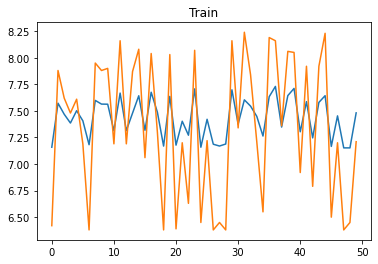

2/2 [==============================] - 2s 14ms/step


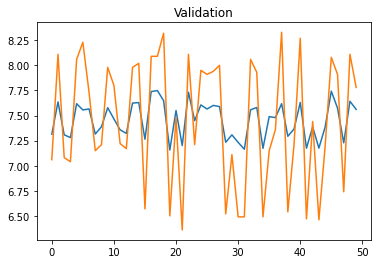

3/3 [==============================] - 0s 21ms/step


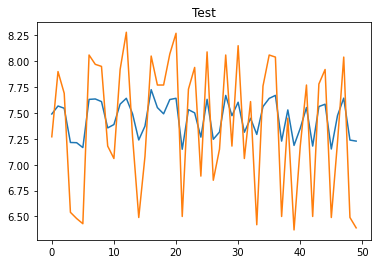

3/3 [==============================] - 0s 7ms/step


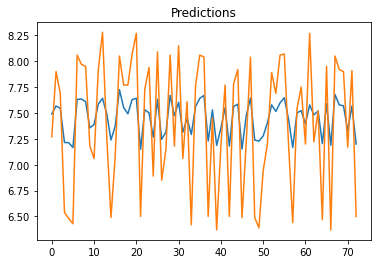

In [14]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 42.7275 - root_mean_squared_error: 6.5366 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 42.7275 - root_mean_squared_error: 6.5366 - val_loss: 40.1485 - val_root_mean_squared_error: 6.3363
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 39.1119 - root_mean_squared_error: 6.2539INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 39.1119 - root_mean_squared_error: 6.2539 - val_loss: 36.6797 - val_root_mean_squared_error: 6.0564
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 36.2029 - root_mean_squared_error: 6.0169INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 35.7272 - root_mean_squared_error: 5.9772 - val_loss: 33.4387 - val_root_mean_squared_error: 5.7826
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 32.6520 - root_mean_squared_error: 5.7142INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 32.5690 - root_mean_squared_error: 5.7069 - val_loss: 30.4401 - val_root_mean_squared_error: 5.5173
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 29.6537 - root_mean_squared_error: 5.4455INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 29.6537 - root_mean_squared_error: 5.4455 - val_loss: 27.6761 - val_root_mean_squared_error: 5.2608
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 27.0457 - root_mean_squared_error: 5.2006INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 26.9662 - root_mean_squared_error: 5.1929 - val_loss: 25.1353 - val_root_mean_squared_error: 5.0135
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 24.7631 - root_mean_squared_error: 4.9763INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 24.5030 - root_mean_squared_error: 4.9500 - val_loss: 22.8051 - val_root_mean_squared_error: 4.7755
Epoch 8/50
4/8 [==============>...............] - ETA: 0s - loss: 22.5994 - root_mean_squared_error: 4.7539INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 22.2349 - root_mean_squared_error: 4.7154 - val_loss: 20.6726 - val_root_mean_squared_error: 4.5467
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 20.2331 - root_mean_squared_error: 4.4981INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 20.1619 - root_mean_squared_error: 4.4902 - val_loss: 18.7249 - val_root_mean_squared_error: 4.3272
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 18.2250 - root_mean_squared_error: 4.2691INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 18.2697 - root_mean_squared_error: 4.2743 - val_loss: 16.9450 - val_root_mean_squared_error: 4.1164
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 16.9108 - root_mean_squared_error: 4.1123INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 16.5416 - root_mean_squared_error: 4.0671 - val_loss: 15.3090 - val_root_mean_squared_error: 3.9127
Epoch 12/50
4/8 [==============>...............] - ETA: 0s - loss: 14.7556 - root_mean_squared_error: 3.8413INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 14.9449 - root_mean_squared_error: 3.8659 - val_loss: 13.8144 - val_root_mean_squared_error: 3.7168
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 13.4857 - root_mean_squared_error: 3.6723INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 13.4857 - root_mean_squared_error: 3.6723 - val_loss: 12.4234 - val_root_mean_squared_error: 3.5247
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 12.3893 - root_mean_squared_error: 3.5198INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 12.1417 - root_mean_squared_error: 3.4845 - val_loss: 11.1862 - val_root_mean_squared_error: 3.3446
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 10.9388 - root_mean_squared_error: 3.3074INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 10.9388 - root_mean_squared_error: 3.3074 - val_loss: 10.0518 - val_root_mean_squared_error: 3.1705
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 9.7954 - root_mean_squared_error: 3.1298INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 9.8283 - root_mean_squared_error: 3.1350 - val_loss: 9.0136 - val_root_mean_squared_error: 3.0023
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 8.8875 - root_mean_squared_error: 2.9812 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 8.8192 - root_mean_squared_error: 2.9697 - val_loss: 8.0577 - val_root_mean_squared_error: 2.8386
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 7.8840 - root_mean_squared_error: 2.8078INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 7.8840 - root_mean_squared_error: 2.8078 - val_loss: 7.1814 - val_root_mean_squared_error: 2.6798
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 7.0597 - root_mean_squared_error: 2.6570INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 7.0237 - root_mean_squared_error: 2.6502 - val_loss: 6.3736 - val_root_mean_squared_error: 2.5246
Epoch 20/50
4/8 [==============>...............] - ETA: 0s - loss: 6.5773 - root_mean_squared_error: 2.5646INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 6.2325 - root_mean_squared_error: 2.4965 - val_loss: 5.6312 - val_root_mean_squared_error: 2.3730
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 5.5511 - root_mean_squared_error: 2.3561INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 5.5018 - root_mean_squared_error: 2.3456 - val_loss: 4.9517 - val_root_mean_squared_error: 2.2253
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 4.8366 - root_mean_squared_error: 2.1992INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 4.8366 - root_mean_squared_error: 2.1992 - val_loss: 4.3389 - val_root_mean_squared_error: 2.0830
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 4.2399 - root_mean_squared_error: 2.0591INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 4.2399 - root_mean_squared_error: 2.0591 - val_loss: 3.7931 - val_root_mean_squared_error: 1.9476
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 3.0125 - root_mean_squared_error: 1.7357INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 3.7113 - root_mean_squared_error: 1.9265 - val_loss: 3.3120 - val_root_mean_squared_error: 1.8199
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 3.2269 - root_mean_squared_error: 1.7964INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 3.2512 - root_mean_squared_error: 1.8031 - val_loss: 2.8896 - val_root_mean_squared_error: 1.6999
Epoch 26/50
1/8 [==>...........................] - ETA: 0s - loss: 3.1249 - root_mean_squared_error: 1.7677INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2.8418 - root_mean_squared_error: 1.6857 - val_loss: 2.5229 - val_root_mean_squared_error: 1.5884
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 2.4832 - root_mean_squared_error: 1.5758INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.4910 - root_mean_squared_error: 1.5783 - val_loss: 2.2100 - val_root_mean_squared_error: 1.4866
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2.1893 - root_mean_squared_error: 1.4796INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.1893 - root_mean_squared_error: 1.4796 - val_loss: 1.9390 - val_root_mean_squared_error: 1.3925
Epoch 29/50
1/8 [==>...........................] - ETA: 0s - loss: 2.1227 - root_mean_squared_error: 1.4569INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.9289 - root_mean_squared_error: 1.3889 - val_loss: 1.7054 - val_root_mean_squared_error: 1.3059
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 1.7845 - root_mean_squared_error: 1.3358INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.7059 - root_mean_squared_error: 1.3061 - val_loss: 1.5041 - val_root_mean_squared_error: 1.2264
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 1.5100 - root_mean_squared_error: 1.2288INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.5100 - root_mean_squared_error: 1.2288 - val_loss: 1.3320 - val_root_mean_squared_error: 1.1541
Epoch 32/50
1/8 [==>...........................] - ETA: 0s - loss: 1.3145 - root_mean_squared_error: 1.1465INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.3437 - root_mean_squared_error: 1.1592 - val_loss: 1.1872 - val_root_mean_squared_error: 1.0896
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1.2029 - root_mean_squared_error: 1.0967INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.2029 - root_mean_squared_error: 1.0967 - val_loss: 1.0607 - val_root_mean_squared_error: 1.0299
Epoch 34/50
5/8 [=================>............] - ETA: 0s - loss: 1.0588 - root_mean_squared_error: 1.0290INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.0789 - root_mean_squared_error: 1.0387 - val_loss: 0.9529 - val_root_mean_squared_error: 0.9761
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 0.8688 - root_mean_squared_error: 0.9321INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.9721 - root_mean_squared_error: 0.9860 - val_loss: 0.8583 - val_root_mean_squared_error: 0.9264
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8358 - root_mean_squared_error: 0.9142INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.8791 - root_mean_squared_error: 0.9376 - val_loss: 0.7769 - val_root_mean_squared_error: 0.8814
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 0.7862 - root_mean_squared_error: 0.8867INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.7992 - root_mean_squared_error: 0.8940 - val_loss: 0.7068 - val_root_mean_squared_error: 0.8407
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7398 - root_mean_squared_error: 0.8601INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.7316 - root_mean_squared_error: 0.8554 - val_loss: 0.6459 - val_root_mean_squared_error: 0.8037
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 0.7016 - root_mean_squared_error: 0.8376INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 0.6709 - root_mean_squared_error: 0.8191 - val_loss: 0.5944 - val_root_mean_squared_error: 0.7710
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5949 - root_mean_squared_error: 0.7713INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 871ms/step - loss: 0.6188 - root_mean_squared_error: 0.7866 - val_loss: 0.5514 - val_root_mean_squared_error: 0.7425
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5793 - root_mean_squared_error: 0.7611INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.5757 - root_mean_squared_error: 0.7588 - val_loss: 0.5119 - val_root_mean_squared_error: 0.7155
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 0.5354 - root_mean_squared_error: 0.7317INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 917ms/step - loss: 0.5354 - root_mean_squared_error: 0.7317 - val_loss: 0.4780 - val_root_mean_squared_error: 0.6914
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5006 - root_mean_squared_error: 0.7076INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.5005 - root_mean_squared_error: 0.7075 - val_loss: 0.4486 - val_root_mean_squared_error: 0.6698
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 0.4549 - root_mean_squared_error: 0.6745INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 747ms/step - loss: 0.4701 - root_mean_squared_error: 0.6857 - val_loss: 0.4234 - val_root_mean_squared_error: 0.6507
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 0.4300 - root_mean_squared_error: 0.6558INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4444 - root_mean_squared_error: 0.6666 - val_loss: 0.4012 - val_root_mean_squared_error: 0.6334
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4253 - root_mean_squared_error: 0.6521INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.4222 - root_mean_squared_error: 0.6498 - val_loss: 0.3827 - val_root_mean_squared_error: 0.6186
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4061 - root_mean_squared_error: 0.6373INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.4021 - root_mean_squared_error: 0.6341 - val_loss: 0.3661 - val_root_mean_squared_error: 0.6051
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3835 - root_mean_squared_error: 0.6193INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.3851 - root_mean_squared_error: 0.6206 - val_loss: 0.3514 - val_root_mean_squared_error: 0.5928
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3733 - root_mean_squared_error: 0.6110INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.3698 - root_mean_squared_error: 0.6081 - val_loss: 0.3385 - val_root_mean_squared_error: 0.5818
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3602 - root_mean_squared_error: 0.6002INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 16ms/step


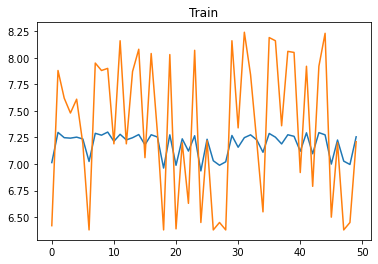

2/2 [==============================] - 1s 6ms/step


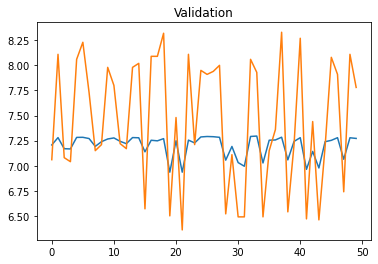

3/3 [==============================] - 0s 5ms/step


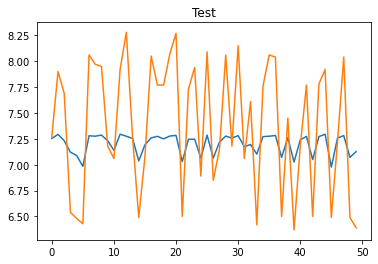

3/3 [==============================] - 0s 4ms/step


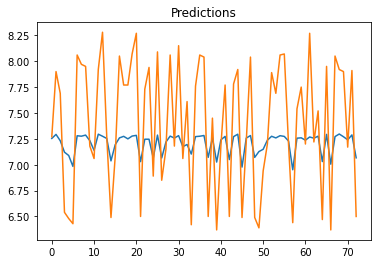

In [15]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [16]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 367.6375 - root_mean_squared_error: 19.1739 

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 604ms/step - loss: 367.6375 - root_mean_squared_error: 19.1739 - val_loss: 28.5162 - val_root_mean_squared_error: 5.3401
Epoch 2/50
8/8 [==============================] - 0s 30ms/step - loss: 88.4818 - root_mean_squared_error: 9.4065 - val_loss: 47.0023 - val_root_mean_squared_error: 6.8558
Epoch 3/50
8/8 [==============================] - 0s 32ms/step - loss: 35.6898 - root_mean_squared_error: 5.9741 - val_loss: 45.7924 - val_root_mean_squared_error: 6.7670
Epoch 4/50
8/8 [==============================] - 0s 38ms/step - loss: 29.1207 - root_mean_squared_error: 5.3964 - val_loss: 40.2462 - val_root_mean_squared_error: 6.3440
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 25.7741 - root_mean_squared_error: 5.0768

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 801ms/step - loss: 25.6985 - root_mean_squared_error: 5.0694 - val_loss: 22.9019 - val_root_mean_squared_error: 4.7856
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 21.2279 - root_mean_squared_error: 4.6074

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 495ms/step - loss: 20.8965 - root_mean_squared_error: 4.5713 - val_loss: 22.6212 - val_root_mean_squared_error: 4.7562
Epoch 7/50
8/8 [==============================] - 0s 30ms/step - loss: 18.8861 - root_mean_squared_error: 4.3458 - val_loss: 23.1446 - val_root_mean_squared_error: 4.8109
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 19.7109 - root_mean_squared_error: 4.4397

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 477ms/step - loss: 18.9817 - root_mean_squared_error: 4.3568 - val_loss: 22.0166 - val_root_mean_squared_error: 4.6922
Epoch 9/50
8/8 [==============================] - 0s 37ms/step - loss: 17.7400 - root_mean_squared_error: 4.2119 - val_loss: 25.6289 - val_root_mean_squared_error: 5.0625
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 18.4063 - root_mean_squared_error: 4.2903

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 452ms/step - loss: 18.2665 - root_mean_squared_error: 4.2739 - val_loss: 21.5234 - val_root_mean_squared_error: 4.6393
Epoch 11/50
8/8 [==============================] - 0s 16ms/step - loss: 17.5854 - root_mean_squared_error: 4.1935 - val_loss: 22.1571 - val_root_mean_squared_error: 4.7071
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 16.3098 - root_mean_squared_error: 4.0385

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 350ms/step - loss: 17.5572 - root_mean_squared_error: 4.1901 - val_loss: 21.2480 - val_root_mean_squared_error: 4.6096
Epoch 13/50
8/8 [==============================] - 0s 31ms/step - loss: 17.4507 - root_mean_squared_error: 4.1774 - val_loss: 21.5685 - val_root_mean_squared_error: 4.6442
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 17.4603 - root_mean_squared_error: 4.1786

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 608ms/step - loss: 17.4603 - root_mean_squared_error: 4.1786 - val_loss: 20.6533 - val_root_mean_squared_error: 4.5446
Epoch 15/50
8/8 [==============================] - 0s 16ms/step - loss: 17.4103 - root_mean_squared_error: 4.1726 - val_loss: 20.8220 - val_root_mean_squared_error: 4.5631
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 16.9734 - root_mean_squared_error: 4.1199

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 580ms/step - loss: 16.9734 - root_mean_squared_error: 4.1199 - val_loss: 20.5179 - val_root_mean_squared_error: 4.5297
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 17.7488 - root_mean_squared_error: 4.2129

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 999ms/step - loss: 17.6878 - root_mean_squared_error: 4.2057 - val_loss: 19.7854 - val_root_mean_squared_error: 4.4481
Epoch 18/50
8/8 [==============================] - 0s 35ms/step - loss: 17.5551 - root_mean_squared_error: 4.1899 - val_loss: 20.2785 - val_root_mean_squared_error: 4.5032
Epoch 19/50
8/8 [==============================] - 0s 31ms/step - loss: 16.9446 - root_mean_squared_error: 4.1164 - val_loss: 20.1354 - val_root_mean_squared_error: 4.4873
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 17.2234 - root_mean_squared_error: 4.1501

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 552ms/step - loss: 17.2234 - root_mean_squared_error: 4.1501 - val_loss: 18.5702 - val_root_mean_squared_error: 4.3093
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 16.0255 - root_mean_squared_error: 4.0032

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 438ms/step - loss: 16.1951 - root_mean_squared_error: 4.0243 - val_loss: 18.1602 - val_root_mean_squared_error: 4.2615
Epoch 22/50
8/8 [==============================] - 0s 26ms/step - loss: 16.2549 - root_mean_squared_error: 4.0317 - val_loss: 19.3880 - val_root_mean_squared_error: 4.4032
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 10.4194 - root_mean_squared_error: 3.2279

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 556ms/step - loss: 15.5252 - root_mean_squared_error: 3.9402 - val_loss: 18.1485 - val_root_mean_squared_error: 4.2601
Epoch 24/50
8/8 [==============================] - 0s 50ms/step - loss: 15.3476 - root_mean_squared_error: 3.9176 - val_loss: 20.8904 - val_root_mean_squared_error: 4.5706
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 16.0728 - root_mean_squared_error: 4.0091

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 509ms/step - loss: 15.8291 - root_mean_squared_error: 3.9786 - val_loss: 17.8777 - val_root_mean_squared_error: 4.2282
Epoch 26/50
8/8 [==============================] - 0s 17ms/step - loss: 15.9130 - root_mean_squared_error: 3.9891 - val_loss: 20.1565 - val_root_mean_squared_error: 4.4896
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 15.9230 - root_mean_squared_error: 3.9904

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 556ms/step - loss: 16.1467 - root_mean_squared_error: 4.0183 - val_loss: 17.7236 - val_root_mean_squared_error: 4.2099
Epoch 28/50
8/8 [==============================] - 0s 48ms/step - loss: 14.9284 - root_mean_squared_error: 3.8637 - val_loss: 19.7423 - val_root_mean_squared_error: 4.4432
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 15.4821 - root_mean_squared_error: 3.9347

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 429ms/step - loss: 15.4821 - root_mean_squared_error: 3.9347 - val_loss: 17.4665 - val_root_mean_squared_error: 4.1793
Epoch 30/50
8/8 [==============================] - 0s 48ms/step - loss: 15.3227 - root_mean_squared_error: 3.9144 - val_loss: 20.6155 - val_root_mean_squared_error: 4.5404
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 14.1764 - root_mean_squared_error: 3.7652

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 627ms/step - loss: 16.2821 - root_mean_squared_error: 4.0351 - val_loss: 17.4065 - val_root_mean_squared_error: 4.1721
Epoch 32/50
8/8 [==============================] - 0s 37ms/step - loss: 15.2898 - root_mean_squared_error: 3.9102 - val_loss: 20.4889 - val_root_mean_squared_error: 4.5265
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 17.0240 - root_mean_squared_error: 4.1260

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 15.4685 - root_mean_squared_error: 3.9330 - val_loss: 17.0859 - val_root_mean_squared_error: 4.1335
Epoch 34/50
8/8 [==============================] - 0s 37ms/step - loss: 15.0918 - root_mean_squared_error: 3.8848 - val_loss: 19.7383 - val_root_mean_squared_error: 4.4428
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 10.8555 - root_mean_squared_error: 3.2948

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 457ms/step - loss: 14.7440 - root_mean_squared_error: 3.8398 - val_loss: 16.8558 - val_root_mean_squared_error: 4.1056
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 15.4071 - root_mean_squared_error: 3.9252

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 622ms/step - loss: 14.9082 - root_mean_squared_error: 3.8611 - val_loss: 16.7710 - val_root_mean_squared_error: 4.0952
Epoch 37/50
1/8 [==>...........................] - ETA: 0s - loss: 8.3921 - root_mean_squared_error: 2.8969

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 598ms/step - loss: 14.7677 - root_mean_squared_error: 3.8429 - val_loss: 16.7186 - val_root_mean_squared_error: 4.0888
Epoch 38/50
8/8 [==============================] - 0s 36ms/step - loss: 14.7376 - root_mean_squared_error: 3.8390 - val_loss: 18.7921 - val_root_mean_squared_error: 4.3350
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 14.9486 - root_mean_squared_error: 3.8663

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 389ms/step - loss: 15.1485 - root_mean_squared_error: 3.8921 - val_loss: 16.4298 - val_root_mean_squared_error: 4.0534
Epoch 40/50
8/8 [==============================] - 0s 31ms/step - loss: 14.0686 - root_mean_squared_error: 3.7508 - val_loss: 17.3255 - val_root_mean_squared_error: 4.1624
Epoch 41/50
8/8 [==============================] - 0s 35ms/step - loss: 14.1074 - root_mean_squared_error: 3.7560 - val_loss: 17.1172 - val_root_mean_squared_error: 4.1373
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 13.8581 - root_mean_squared_error: 3.7227

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 619ms/step - loss: 13.9899 - root_mean_squared_error: 3.7403 - val_loss: 15.9628 - val_root_mean_squared_error: 3.9953
Epoch 43/50
8/8 [==============================] - 1s 69ms/step - loss: 14.1383 - root_mean_squared_error: 3.7601 - val_loss: 16.0789 - val_root_mean_squared_error: 4.0098
Epoch 44/50
8/8 [==============================] - 1s 79ms/step - loss: 13.7124 - root_mean_squared_error: 3.7030 - val_loss: 16.3410 - val_root_mean_squared_error: 4.0424
Epoch 45/50
8/8 [==============================] - 0s 38ms/step - loss: 13.6620 - root_mean_squared_error: 3.6962 - val_loss: 16.9523 - val_root_mean_squared_error: 4.1173
Epoch 46/50
8/8 [==============================] - 0s 20ms/step - loss: 13.6632 - root_mean_squared_error: 3.6964 - val_loss: 16.8706 - val_root_mean_squared_error: 4.1074
Epoch 47/50
1/8 [==>...........................] - ETA: 0s - loss: 10.9811 - root_mean_squared_error: 3.3138

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 538ms/step - loss: 13.6833 - root_mean_squared_error: 3.6991 - val_loss: 15.3088 - val_root_mean_squared_error: 3.9126
Epoch 48/50
8/8 [==============================] - 0s 37ms/step - loss: 13.7029 - root_mean_squared_error: 3.7017 - val_loss: 20.0269 - val_root_mean_squared_error: 4.4751
Epoch 49/50
8/8 [==============================] - 0s 35ms/step - loss: 15.4036 - root_mean_squared_error: 3.9247 - val_loss: 15.5740 - val_root_mean_squared_error: 3.9464
Epoch 50/50
8/8 [==============================] - 1s 5ms/step


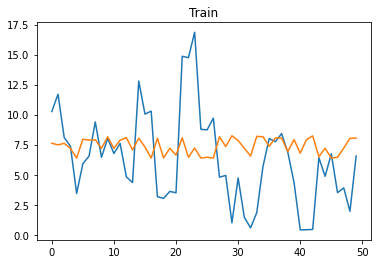

2/2 [==============================] - 0s 4ms/step


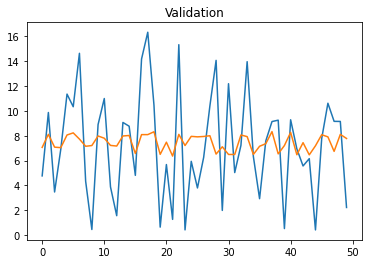

3/3 [==============================] - 0s 4ms/step


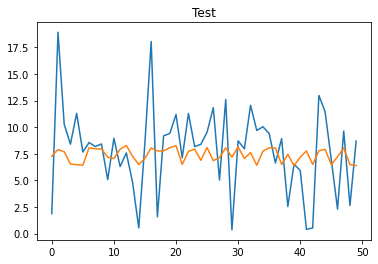

3/3 [==============================] - 0s 4ms/step


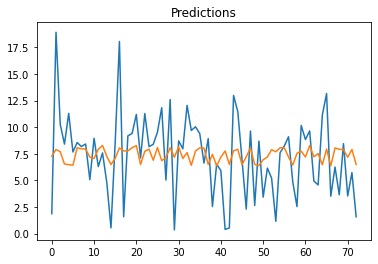

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 67.3087 - root_mean_squared_error: 8.2042

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 37s 3s/step - loss: 67.3087 - root_mean_squared_error: 8.2042 - val_loss: 64.1165 - val_root_mean_squared_error: 8.0073
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 63.6033 - root_mean_squared_error: 7.9752

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 63.5601 - root_mean_squared_error: 7.9725 - val_loss: 60.4785 - val_root_mean_squared_error: 7.7768
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 59.7299 - root_mean_squared_error: 7.7285

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 59.8904 - root_mean_squared_error: 7.7389 - val_loss: 56.9311 - val_root_mean_squared_error: 7.5453
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 56.2467 - root_mean_squared_error: 7.4998

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 56.3320 - root_mean_squared_error: 7.5055 - val_loss: 53.4481 - val_root_mean_squared_error: 7.3108
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 52.8371 - root_mean_squared_error: 7.2689

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 52.8371 - root_mean_squared_error: 7.2689 - val_loss: 50.1010 - val_root_mean_squared_error: 7.0782
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 49.7610 - root_mean_squared_error: 7.0541

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 49.5050 - root_mean_squared_error: 7.0360 - val_loss: 46.8874 - val_root_mean_squared_error: 6.8474
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 46.4283 - root_mean_squared_error: 6.8138

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 46.2999 - root_mean_squared_error: 6.8044 - val_loss: 43.7787 - val_root_mean_squared_error: 6.6165
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 43.1602 - root_mean_squared_error: 6.5696

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 43.1850 - root_mean_squared_error: 6.5715 - val_loss: 40.7630 - val_root_mean_squared_error: 6.3846
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 40.1538 - root_mean_squared_error: 6.3367

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 40.1538 - root_mean_squared_error: 6.3367 - val_loss: 37.8218 - val_root_mean_squared_error: 6.1499
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 37.1382 - root_mean_squared_error: 6.0941

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 37.2023 - root_mean_squared_error: 6.0994 - val_loss: 34.9587 - val_root_mean_squared_error: 5.9126
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 34.3523 - root_mean_squared_error: 5.8611

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 34.3323 - root_mean_squared_error: 5.8594 - val_loss: 32.1721 - val_root_mean_squared_error: 5.6720
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 31.5545 - root_mean_squared_error: 5.6173

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 31.5545 - root_mean_squared_error: 5.6173 - val_loss: 29.4739 - val_root_mean_squared_error: 5.4290
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 28.8512 - root_mean_squared_error: 5.3713

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 28.8524 - root_mean_squared_error: 5.3714 - val_loss: 26.8857 - val_root_mean_squared_error: 5.1851
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 26.2693 - root_mean_squared_error: 5.1254

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 26.2693 - root_mean_squared_error: 5.1254 - val_loss: 24.3949 - val_root_mean_squared_error: 4.9391
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 23.7927 - root_mean_squared_error: 4.8778

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 23.7927 - root_mean_squared_error: 4.8778 - val_loss: 22.0012 - val_root_mean_squared_error: 4.6905
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 21.6173 - root_mean_squared_error: 4.6494

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 21.4108 - root_mean_squared_error: 4.6272 - val_loss: 19.7296 - val_root_mean_squared_error: 4.4418
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 19.1955 - root_mean_squared_error: 4.3813

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 19.1580 - root_mean_squared_error: 4.3770 - val_loss: 17.5814 - val_root_mean_squared_error: 4.1930
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 17.0312 - root_mean_squared_error: 4.1269

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 17.0371 - root_mean_squared_error: 4.1276 - val_loss: 15.5742 - val_root_mean_squared_error: 3.9464
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 15.0793 - root_mean_squared_error: 3.8832

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 15.0584 - root_mean_squared_error: 3.8805 - val_loss: 13.7065 - val_root_mean_squared_error: 3.7022
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 13.3486 - root_mean_squared_error: 3.6536

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 13.2331 - root_mean_squared_error: 3.6377 - val_loss: 11.9837 - val_root_mean_squared_error: 3.4617
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 11.5696 - root_mean_squared_error: 3.4014

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 11.5457 - root_mean_squared_error: 3.3979 - val_loss: 10.3943 - val_root_mean_squared_error: 3.2240
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 9.9806 - root_mean_squared_error: 3.1592 

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 9.9908 - root_mean_squared_error: 3.1608 - val_loss: 8.9381 - val_root_mean_squared_error: 2.9897
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 8.5392 - root_mean_squared_error: 2.9222

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 8.5878 - root_mean_squared_error: 2.9305 - val_loss: 7.6774 - val_root_mean_squared_error: 2.7708
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 7.3902 - root_mean_squared_error: 2.7185

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 7.3714 - root_mean_squared_error: 2.7150 - val_loss: 6.5673 - val_root_mean_squared_error: 2.5627
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 6.3109 - root_mean_squared_error: 2.5122

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 6.3060 - root_mean_squared_error: 2.5112 - val_loss: 5.6051 - val_root_mean_squared_error: 2.3675
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 5.3854 - root_mean_squared_error: 2.3207

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 5.3854 - root_mean_squared_error: 2.3207 - val_loss: 4.7675 - val_root_mean_squared_error: 2.1835
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 4.5885 - root_mean_squared_error: 2.1421

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 4.5873 - root_mean_squared_error: 2.1418 - val_loss: 4.0448 - val_root_mean_squared_error: 2.0112
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 3.8930 - root_mean_squared_error: 1.9731

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 3.8930 - root_mean_squared_error: 1.9731 - val_loss: 3.4250 - val_root_mean_squared_error: 1.8507
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3134 - root_mean_squared_error: 1.8203

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 3.3027 - root_mean_squared_error: 1.8173 - val_loss: 2.8900 - val_root_mean_squared_error: 1.7000
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2.7928 - root_mean_squared_error: 1.6712

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2.7928 - root_mean_squared_error: 1.6712 - val_loss: 2.4450 - val_root_mean_squared_error: 1.5637
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4006 - root_mean_squared_error: 1.5494

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2.3694 - root_mean_squared_error: 1.5393 - val_loss: 2.0724 - val_root_mean_squared_error: 1.4396
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2.0139 - root_mean_squared_error: 1.4191

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2.0139 - root_mean_squared_error: 1.4191 - val_loss: 1.7573 - val_root_mean_squared_error: 1.3256
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 1.7125 - root_mean_squared_error: 1.3086

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.7125 - root_mean_squared_error: 1.3086 - val_loss: 1.4914 - val_root_mean_squared_error: 1.2212
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4637 - root_mean_squared_error: 1.2098

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 1.4588 - root_mean_squared_error: 1.2078 - val_loss: 1.2722 - val_root_mean_squared_error: 1.1279
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3033 - root_mean_squared_error: 1.1416

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.2538 - root_mean_squared_error: 1.1197 - val_loss: 1.0914 - val_root_mean_squared_error: 1.0447
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0971 - root_mean_squared_error: 1.0474

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.0799 - root_mean_squared_error: 1.0392 - val_loss: 0.9446 - val_root_mean_squared_error: 0.9719
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9344 - root_mean_squared_error: 0.9666

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.9380 - root_mean_squared_error: 0.9685 - val_loss: 0.8231 - val_root_mean_squared_error: 0.9073
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8529 - root_mean_squared_error: 0.9235

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.8236 - root_mean_squared_error: 0.9075 - val_loss: 0.7238 - val_root_mean_squared_error: 0.8508
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7184 - root_mean_squared_error: 0.8476

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 0.7276 - root_mean_squared_error: 0.8530 - val_loss: 0.6458 - val_root_mean_squared_error: 0.8036
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6546 - root_mean_squared_error: 0.8091

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.6507 - root_mean_squared_error: 0.8067 - val_loss: 0.5801 - val_root_mean_squared_error: 0.7616
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 0.6093 - root_mean_squared_error: 0.7806

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.5894 - root_mean_squared_error: 0.7677 - val_loss: 0.5282 - val_root_mean_squared_error: 0.7268
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5381 - root_mean_squared_error: 0.7335

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 0.5392 - root_mean_squared_error: 0.7343 - val_loss: 0.4881 - val_root_mean_squared_error: 0.6986
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5010 - root_mean_squared_error: 0.7078

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 0.4990 - root_mean_squared_error: 0.7064 - val_loss: 0.4570 - val_root_mean_squared_error: 0.6760
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4755 - root_mean_squared_error: 0.6896

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.4694 - root_mean_squared_error: 0.6851 - val_loss: 0.4317 - val_root_mean_squared_error: 0.6570
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4408 - root_mean_squared_error: 0.6639

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 0.4433 - root_mean_squared_error: 0.6658 - val_loss: 0.4113 - val_root_mean_squared_error: 0.6413
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 0.4180 - root_mean_squared_error: 0.6466

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.4223 - root_mean_squared_error: 0.6498 - val_loss: 0.3938 - val_root_mean_squared_error: 0.6275
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.4064 - root_mean_squared_error: 0.6375

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 0.4064 - root_mean_squared_error: 0.6375 - val_loss: 0.3798 - val_root_mean_squared_error: 0.6163
Epoch 48/50
5/8 [=================>............] - ETA: 0s - loss: 0.3763 - root_mean_squared_error: 0.6134

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.3910 - root_mean_squared_error: 0.6253 - val_loss: 0.3696 - val_root_mean_squared_error: 0.6079
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.3805 - root_mean_squared_error: 0.6168

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 0.3805 - root_mean_squared_error: 0.6168 - val_loss: 0.3615 - val_root_mean_squared_error: 0.6012
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 0.3718 - root_mean_squared_error: 0.6098

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 13ms/step


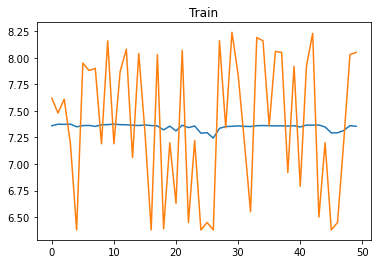

2/2 [==============================] - 2s 6ms/step


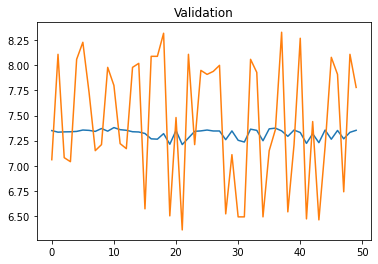

3/3 [==============================] - 0s 7ms/step


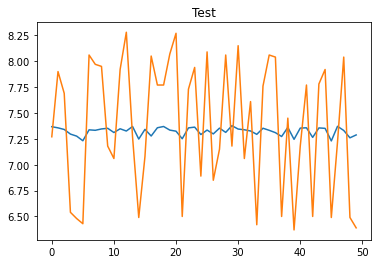

3/3 [==============================] - 0s 6ms/step


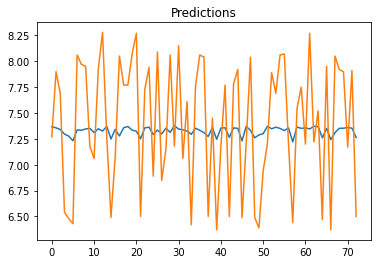

In [18]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 48.3297 - root_mean_squared_error: 6.9520

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 45s 4s/step - loss: 48.3297 - root_mean_squared_error: 6.9520 - val_loss: 46.7880 - val_root_mean_squared_error: 6.8402
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 47.0968 - root_mean_squared_error: 6.8627

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 46.9466 - root_mean_squared_error: 6.8518 - val_loss: 45.4420 - val_root_mean_squared_error: 6.7411
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 45.7618 - root_mean_squared_error: 6.7647

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 45.5811 - root_mean_squared_error: 6.7514 - val_loss: 44.0895 - val_root_mean_squared_error: 6.6400
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 44.1160 - root_mean_squared_error: 6.6420

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 44.2041 - root_mean_squared_error: 6.6486 - val_loss: 42.7104 - val_root_mean_squared_error: 6.5353
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 42.8038 - root_mean_squared_error: 6.5425

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 42.8038 - root_mean_squared_error: 6.5425 - val_loss: 41.3026 - val_root_mean_squared_error: 6.4267
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 41.3422 - root_mean_squared_error: 6.4298

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 41.3422 - root_mean_squared_error: 6.4298 - val_loss: 39.7658 - val_root_mean_squared_error: 6.3060
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 39.7191 - root_mean_squared_error: 6.3023

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 39.7213 - root_mean_squared_error: 6.3025 - val_loss: 38.1116 - val_root_mean_squared_error: 6.1735
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 38.1775 - root_mean_squared_error: 6.1788

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 38.0780 - root_mean_squared_error: 6.1707 - val_loss: 36.5484 - val_root_mean_squared_error: 6.0455
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 36.4445 - root_mean_squared_error: 6.0369

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 36.5082 - root_mean_squared_error: 6.0422 - val_loss: 34.9903 - val_root_mean_squared_error: 5.9153
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 34.9219 - root_mean_squared_error: 5.9095

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 34.9316 - root_mean_squared_error: 5.9103 - val_loss: 33.4442 - val_root_mean_squared_error: 5.7831
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 33.3659 - root_mean_squared_error: 5.7763

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 33.3659 - root_mean_squared_error: 5.7763 - val_loss: 31.8929 - val_root_mean_squared_error: 5.6474
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 31.7878 - root_mean_squared_error: 5.6381

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 31.7869 - root_mean_squared_error: 5.6380 - val_loss: 30.3164 - val_root_mean_squared_error: 5.5060
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 30.1776 - root_mean_squared_error: 5.4934

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 30.1776 - root_mean_squared_error: 5.4934 - val_loss: 28.7044 - val_root_mean_squared_error: 5.3576
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 28.5195 - root_mean_squared_error: 5.3404

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 28.5278 - root_mean_squared_error: 5.3411 - val_loss: 27.0351 - val_root_mean_squared_error: 5.1995
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 26.7379 - root_mean_squared_error: 5.1709

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 26.7529 - root_mean_squared_error: 5.1723 - val_loss: 25.1379 - val_root_mean_squared_error: 5.0138
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 24.8453 - root_mean_squared_error: 4.9845

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 24.8453 - root_mean_squared_error: 4.9845 - val_loss: 23.3280 - val_root_mean_squared_error: 4.8299
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 23.3135 - root_mean_squared_error: 4.8284

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 23.0784 - root_mean_squared_error: 4.8040 - val_loss: 21.6543 - val_root_mean_squared_error: 4.6534
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 21.5490 - root_mean_squared_error: 4.6421

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 21.3802 - root_mean_squared_error: 4.6239 - val_loss: 19.9546 - val_root_mean_squared_error: 4.4671
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 19.9829 - root_mean_squared_error: 4.4702

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 19.7019 - root_mean_squared_error: 4.4387 - val_loss: 18.3932 - val_root_mean_squared_error: 4.2887
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 18.1679 - root_mean_squared_error: 4.2624

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 18.1679 - root_mean_squared_error: 4.2624 - val_loss: 16.9228 - val_root_mean_squared_error: 4.1137
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 16.8473 - root_mean_squared_error: 4.1045

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 16.6885 - root_mean_squared_error: 4.0852 - val_loss: 15.4532 - val_root_mean_squared_error: 3.9311
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 15.1741 - root_mean_squared_error: 3.8954

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 15.1741 - root_mean_squared_error: 3.8954 - val_loss: 13.9050 - val_root_mean_squared_error: 3.7289
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 13.6130 - root_mean_squared_error: 3.6896

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 13.6531 - root_mean_squared_error: 3.6950 - val_loss: 12.5432 - val_root_mean_squared_error: 3.5416
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 12.3296 - root_mean_squared_error: 3.5114

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 12.3296 - root_mean_squared_error: 3.5114 - val_loss: 11.2847 - val_root_mean_squared_error: 3.3593
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 11.0782 - root_mean_squared_error: 3.3284

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 11.0782 - root_mean_squared_error: 3.3284 - val_loss: 10.0981 - val_root_mean_squared_error: 3.1778
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 9.9097 - root_mean_squared_error: 3.1480 

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 9.9097 - root_mean_squared_error: 3.1480 - val_loss: 8.9829 - val_root_mean_squared_error: 2.9972
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 8.8271 - root_mean_squared_error: 2.9710

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 8.7996 - root_mean_squared_error: 2.9664 - val_loss: 7.8736 - val_root_mean_squared_error: 2.8060
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 7.6509 - root_mean_squared_error: 2.7660

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 7.6329 - root_mean_squared_error: 2.7628 - val_loss: 6.7611 - val_root_mean_squared_error: 2.6002
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 6.6214 - root_mean_squared_error: 2.5732

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 6.6283 - root_mean_squared_error: 2.5746 - val_loss: 5.8964 - val_root_mean_squared_error: 2.4283
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 5.7944 - root_mean_squared_error: 2.4072

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 5.7944 - root_mean_squared_error: 2.4072 - val_loss: 5.1230 - val_root_mean_squared_error: 2.2634
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 5.0678 - root_mean_squared_error: 2.2512

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 5.0325 - root_mean_squared_error: 2.2433 - val_loss: 4.3814 - val_root_mean_squared_error: 2.0932
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 4.2800 - root_mean_squared_error: 2.0688

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 4.2778 - root_mean_squared_error: 2.0683 - val_loss: 3.6892 - val_root_mean_squared_error: 1.9207
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 3.6446 - root_mean_squared_error: 1.9091

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 3.6446 - root_mean_squared_error: 1.9091 - val_loss: 3.1446 - val_root_mean_squared_error: 1.7733
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 3.0232 - root_mean_squared_error: 1.7387

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 3.1017 - root_mean_squared_error: 1.7612 - val_loss: 2.6318 - val_root_mean_squared_error: 1.6223
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2.7278 - root_mean_squared_error: 1.6516

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2.6186 - root_mean_squared_error: 1.6182 - val_loss: 2.2043 - val_root_mean_squared_error: 1.4847
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2.2082 - root_mean_squared_error: 1.4860

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2.2082 - root_mean_squared_error: 1.4860 - val_loss: 1.8404 - val_root_mean_squared_error: 1.3566
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.8547 - root_mean_squared_error: 1.3619

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 1.8558 - root_mean_squared_error: 1.3623 - val_loss: 1.5198 - val_root_mean_squared_error: 1.2328
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 1.5177 - root_mean_squared_error: 1.2320

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 1.5177 - root_mean_squared_error: 1.2320 - val_loss: 1.1380 - val_root_mean_squared_error: 1.0668
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2518 - root_mean_squared_error: 1.1188

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 1.1747 - root_mean_squared_error: 1.0838 - val_loss: 0.9081 - val_root_mean_squared_error: 0.9529
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 0.9687 - root_mean_squared_error: 0.9842

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 0.9687 - root_mean_squared_error: 0.9842 - val_loss: 0.7464 - val_root_mean_squared_error: 0.8640
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8188 - root_mean_squared_error: 0.9049

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 0.8201 - root_mean_squared_error: 0.9056 - val_loss: 0.6272 - val_root_mean_squared_error: 0.7920
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7098 - root_mean_squared_error: 0.8425

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 0.7079 - root_mean_squared_error: 0.8414 - val_loss: 0.5278 - val_root_mean_squared_error: 0.7265
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 0.6136 - root_mean_squared_error: 0.7833

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 0.6129 - root_mean_squared_error: 0.7829 - val_loss: 0.4456 - val_root_mean_squared_error: 0.6676
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 0.5332 - root_mean_squared_error: 0.7302

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 0.5332 - root_mean_squared_error: 0.7302 - val_loss: 0.3762 - val_root_mean_squared_error: 0.6134
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 0.4811 - root_mean_squared_error: 0.6936

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 0.4669 - root_mean_squared_error: 0.6833 - val_loss: 0.3269 - val_root_mean_squared_error: 0.5717
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 0.4246 - root_mean_squared_error: 0.6516

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 0.4240 - root_mean_squared_error: 0.6512 - val_loss: 0.2938 - val_root_mean_squared_error: 0.5420
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.3920 - root_mean_squared_error: 0.6261

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 0.3932 - root_mean_squared_error: 0.6271 - val_loss: 0.2681 - val_root_mean_squared_error: 0.5178
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 0.3661 - root_mean_squared_error: 0.6051

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 0.3686 - root_mean_squared_error: 0.6071 - val_loss: 0.2495 - val_root_mean_squared_error: 0.4995
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.3505 - root_mean_squared_error: 0.5921

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 0.3505 - root_mean_squared_error: 0.5921 - val_loss: 0.2347 - val_root_mean_squared_error: 0.4844
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3319 - root_mean_squared_error: 0.5761

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 3s 11ms/step


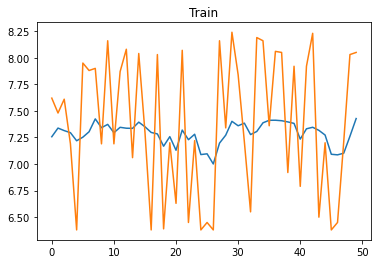

2/2 [==============================] - 3s 10ms/step


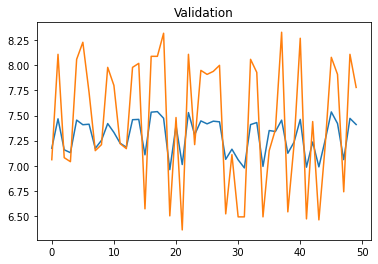

3/3 [==============================] - 0s 6ms/step


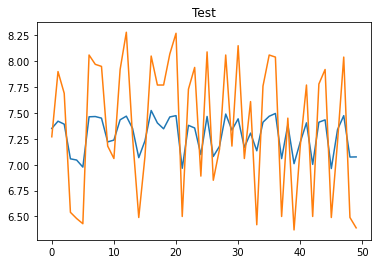

3/3 [==============================] - 0s 51ms/step


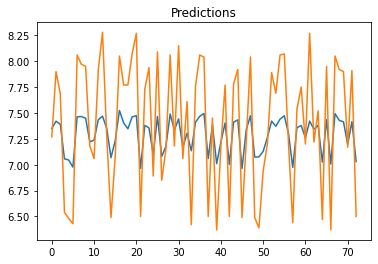

In [19]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 38.1285 - root_mean_squared_error: 6.1748 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 21s 2s/step - loss: 38.1285 - root_mean_squared_error: 6.1748 - val_loss: 35.2609 - val_root_mean_squared_error: 5.9381
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 34.3727 - root_mean_squared_error: 5.8628INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 34.0480 - root_mean_squared_error: 5.8351 - val_loss: 31.4383 - val_root_mean_squared_error: 5.6070
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 30.2832 - root_mean_squared_error: 5.5030INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 30.2832 - root_mean_squared_error: 5.5030 - val_loss: 27.9240 - val_root_mean_squared_error: 5.2843
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 29.3312 - root_mean_squared_error: 5.4158INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 26.8573 - root_mean_squared_error: 5.1824 - val_loss: 24.7040 - val_root_mean_squared_error: 4.9703
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 23.7154 - root_mean_squared_error: 4.8699INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 23.7154 - root_mean_squared_error: 4.8699 - val_loss: 21.8019 - val_root_mean_squared_error: 4.6692
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 20.9000 - root_mean_squared_error: 4.5717INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 20.9000 - root_mean_squared_error: 4.5717 - val_loss: 19.1958 - val_root_mean_squared_error: 4.3813
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 18.3746 - root_mean_squared_error: 4.2866INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 18.3746 - root_mean_squared_error: 4.2866 - val_loss: 16.8535 - val_root_mean_squared_error: 4.1053
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 16.2047 - root_mean_squared_error: 4.0255INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 16.1015 - root_mean_squared_error: 4.0127 - val_loss: 14.7624 - val_root_mean_squared_error: 3.8422
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 14.0912 - root_mean_squared_error: 3.7538INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 14.0902 - root_mean_squared_error: 3.7537 - val_loss: 12.8870 - val_root_mean_squared_error: 3.5898
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 12.3065 - root_mean_squared_error: 3.5081INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 12.2847 - root_mean_squared_error: 3.5049 - val_loss: 11.2158 - val_root_mean_squared_error: 3.3490
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 10.6853 - root_mean_squared_error: 3.2688INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 992ms/step - loss: 10.6853 - root_mean_squared_error: 3.2688 - val_loss: 9.7332 - val_root_mean_squared_error: 3.1198
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 9.2946 - root_mean_squared_error: 3.0487INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 9.2645 - root_mean_squared_error: 3.0438 - val_loss: 8.4335 - val_root_mean_squared_error: 2.9040
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 8.0284 - root_mean_squared_error: 2.8334INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 8.0284 - root_mean_squared_error: 2.8334 - val_loss: 7.2871 - val_root_mean_squared_error: 2.6995
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 6.9557 - root_mean_squared_error: 2.6374INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 6.9288 - root_mean_squared_error: 2.6323 - val_loss: 6.2857 - val_root_mean_squared_error: 2.5071
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 5.9784 - root_mean_squared_error: 2.4451INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 5.9784 - root_mean_squared_error: 2.4451 - val_loss: 5.4013 - val_root_mean_squared_error: 2.3241
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 5.1408 - root_mean_squared_error: 2.2673INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 5.1408 - root_mean_squared_error: 2.2673 - val_loss: 4.6387 - val_root_mean_squared_error: 2.1538
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 4.4820 - root_mean_squared_error: 2.1171INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 4.4219 - root_mean_squared_error: 2.1028 - val_loss: 3.9791 - val_root_mean_squared_error: 1.9948
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 4.0756 - root_mean_squared_error: 2.0188INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 3.8079 - root_mean_squared_error: 1.9514 - val_loss: 3.4191 - val_root_mean_squared_error: 1.8491
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 3.3159 - root_mean_squared_error: 1.8209INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 3.2794 - root_mean_squared_error: 1.8109 - val_loss: 2.9367 - val_root_mean_squared_error: 1.7137
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2.8293 - root_mean_squared_error: 1.6820INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.8293 - root_mean_squared_error: 1.6820 - val_loss: 2.5238 - val_root_mean_squared_error: 1.5886
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4463 - root_mean_squared_error: 1.5641INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2.4440 - root_mean_squared_error: 1.5633 - val_loss: 2.1719 - val_root_mean_squared_error: 1.4737
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2.1081 - root_mean_squared_error: 1.4519INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2.1128 - root_mean_squared_error: 1.4535 - val_loss: 1.8695 - val_root_mean_squared_error: 1.3673
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 1.9068 - root_mean_squared_error: 1.3809INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.8271 - root_mean_squared_error: 1.3517 - val_loss: 1.6084 - val_root_mean_squared_error: 1.2682
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 1.5965 - root_mean_squared_error: 1.2635INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.5823 - root_mean_squared_error: 1.2579 - val_loss: 1.3873 - val_root_mean_squared_error: 1.1778
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 1.3857 - root_mean_squared_error: 1.1771INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.3758 - root_mean_squared_error: 1.1729 - val_loss: 1.2010 - val_root_mean_squared_error: 1.0959
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1884 - root_mean_squared_error: 1.0901INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 1.2037 - root_mean_squared_error: 1.0971 - val_loss: 1.0393 - val_root_mean_squared_error: 1.0195
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 1.0554 - root_mean_squared_error: 1.0273INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.0522 - root_mean_squared_error: 1.0258 - val_loss: 0.9025 - val_root_mean_squared_error: 0.9500
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9284 - root_mean_squared_error: 0.9636INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.9267 - root_mean_squared_error: 0.9627 - val_loss: 0.7875 - val_root_mean_squared_error: 0.8874
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8242 - root_mean_squared_error: 0.9079INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.8208 - root_mean_squared_error: 0.9060 - val_loss: 0.6924 - val_root_mean_squared_error: 0.8321
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7252 - root_mean_squared_error: 0.8516INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 0.7333 - root_mean_squared_error: 0.8563 - val_loss: 0.6129 - val_root_mean_squared_error: 0.7829
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6613 - root_mean_squared_error: 0.8132INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.6604 - root_mean_squared_error: 0.8126 - val_loss: 0.5461 - val_root_mean_squared_error: 0.7390
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 0.5914 - root_mean_squared_error: 0.7690INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.5980 - root_mean_squared_error: 0.7733 - val_loss: 0.4910 - val_root_mean_squared_error: 0.7007
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 0.5504 - root_mean_squared_error: 0.7419INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 0.5504 - root_mean_squared_error: 0.7419 - val_loss: 0.4435 - val_root_mean_squared_error: 0.6660
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 0.5028 - root_mean_squared_error: 0.7091INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.5056 - root_mean_squared_error: 0.7110 - val_loss: 0.4049 - val_root_mean_squared_error: 0.6363
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 0.4619 - root_mean_squared_error: 0.6796INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 964ms/step - loss: 0.4702 - root_mean_squared_error: 0.6857 - val_loss: 0.3716 - val_root_mean_squared_error: 0.6096
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 0.4406 - root_mean_squared_error: 0.6638INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.4406 - root_mean_squared_error: 0.6638 - val_loss: 0.3426 - val_root_mean_squared_error: 0.5853
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 0.4147 - root_mean_squared_error: 0.6440INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.4147 - root_mean_squared_error: 0.6440 - val_loss: 0.3193 - val_root_mean_squared_error: 0.5651
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 0.3914 - root_mean_squared_error: 0.6256INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 0.3940 - root_mean_squared_error: 0.6277 - val_loss: 0.3018 - val_root_mean_squared_error: 0.5494
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3773 - root_mean_squared_error: 0.6143INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 0.3785 - root_mean_squared_error: 0.6153 - val_loss: 0.2871 - val_root_mean_squared_error: 0.5358
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 0.3586 - root_mean_squared_error: 0.5988INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 0.3655 - root_mean_squared_error: 0.6046 - val_loss: 0.2744 - val_root_mean_squared_error: 0.5238
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 0.3629 - root_mean_squared_error: 0.6024INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.3547 - root_mean_squared_error: 0.5956 - val_loss: 0.2645 - val_root_mean_squared_error: 0.5143
Epoch 42/50
5/8 [=================>............] - ETA: 0s - loss: 0.3529 - root_mean_squared_error: 0.5941INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.3462 - root_mean_squared_error: 0.5884 - val_loss: 0.2562 - val_root_mean_squared_error: 0.5062
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 0.3396 - root_mean_squared_error: 0.5827INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 847ms/step - loss: 0.3396 - root_mean_squared_error: 0.5827 - val_loss: 0.2494 - val_root_mean_squared_error: 0.4994
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 0.3369 - root_mean_squared_error: 0.5805INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.3339 - root_mean_squared_error: 0.5779 - val_loss: 0.2439 - val_root_mean_squared_error: 0.4939
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 0.3278 - root_mean_squared_error: 0.5726INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.3292 - root_mean_squared_error: 0.5737 - val_loss: 0.2394 - val_root_mean_squared_error: 0.4892
Epoch 46/50
4/8 [==============>...............] - ETA: 0s - loss: 0.3246 - root_mean_squared_error: 0.5698INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 0.3265 - root_mean_squared_error: 0.5714 - val_loss: 0.2349 - val_root_mean_squared_error: 0.4847
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 0.3299 - root_mean_squared_error: 0.5744INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 0.3229 - root_mean_squared_error: 0.5683 - val_loss: 0.2317 - val_root_mean_squared_error: 0.4813
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.3208 - root_mean_squared_error: 0.5664INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 0.3208 - root_mean_squared_error: 0.5664 - val_loss: 0.2289 - val_root_mean_squared_error: 0.4785
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.3191 - root_mean_squared_error: 0.5649INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 0.3191 - root_mean_squared_error: 0.5649 - val_loss: 0.2265 - val_root_mean_squared_error: 0.4760
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 0.3094 - root_mean_squared_error: 0.5563INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 2s 5ms/step


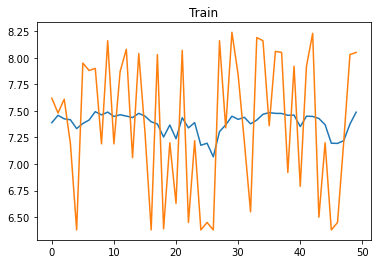

2/2 [==============================] - 1s 7ms/step


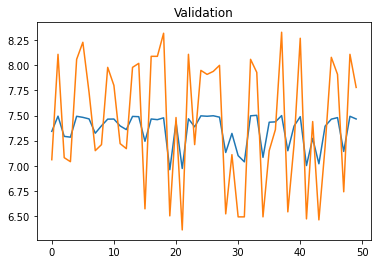

3/3 [==============================] - 0s 139ms/step


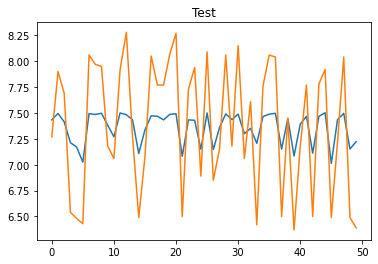

3/3 [==============================] - 0s 6ms/step


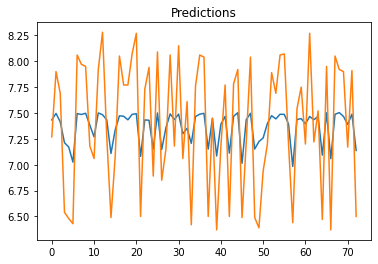

In [20]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 34189.8359 - root_mean_squared_error: 184.9049 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 851ms/step - loss: 32763.0996 - root_mean_squared_error: 181.0058 - val_loss: 156.0993 - val_root_mean_squared_error: 12.4940
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 13616.2412 - root_mean_squared_error: 116.6887 - val_loss: 2895.4070 - val_root_mean_squared_error: 53.8090
Epoch 3/50
8/8 [==============================] - 0s 30ms/step - loss: 10871.3008 - root_mean_squared_error: 104.2655 - val_loss: 4025.3276 - val_root_mean_squared_error: 63.4455
Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 11235.4307 - root_mean_squared_error: 105.9973 - val_loss: 1791.3993 - val_root_mean_squared_error: 42.3249
Epoch 5/50
8/8 [==============================] - 0s 49ms/step - loss: 8776.7725 - root_mean_squared_error: 93.6844 - val_loss: 278.5362 - val_root_mean_squared_error: 16.6894
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 8952.0840 - root_mean_squared_error: 94.6155

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 835ms/step - loss: 8539.8271 - root_mean_squared_error: 92.4112 - val_loss: 32.4039 - val_root_mean_squared_error: 5.6924
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 8642.4922 - root_mean_squared_error: 92.9650

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 618ms/step - loss: 8642.4922 - root_mean_squared_error: 92.9650 - val_loss: 10.5194 - val_root_mean_squared_error: 3.2434
Epoch 8/50
8/8 [==============================] - 0s 42ms/step - loss: 6790.8960 - root_mean_squared_error: 82.4069 - val_loss: 79.9594 - val_root_mean_squared_error: 8.9420
Epoch 9/50
8/8 [==============================] - 0s 45ms/step - loss: 5697.0298 - root_mean_squared_error: 75.4787 - val_loss: 408.5926 - val_root_mean_squared_error: 20.2137
Epoch 10/50
8/8 [==============================] - 0s 35ms/step - loss: 5225.2002 - root_mean_squared_error: 72.2855 - val_loss: 415.9186 - val_root_mean_squared_error: 20.3941
Epoch 11/50
8/8 [==============================] - 0s 28ms/step - loss: 4126.5278 - root_mean_squared_error: 64.2381 - val_loss: 116.8109 - val_root_mean_squared_error: 10.8079
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 3237.3547 - root_mean_squared_error: 56.8978

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 3073.8889 - root_mean_squared_error: 55.4427 - val_loss: 6.5159 - val_root_mean_squared_error: 2.5526
Epoch 13/50
8/8 [==============================] - 0s 21ms/step - loss: 2000.8739 - root_mean_squared_error: 44.7311 - val_loss: 55.9460 - val_root_mean_squared_error: 7.4797
Epoch 14/50
8/8 [==============================] - 0s 36ms/step - loss: 1262.5553 - root_mean_squared_error: 35.5325 - val_loss: 55.9488 - val_root_mean_squared_error: 7.4799
Epoch 15/50
8/8 [==============================] - 0s 55ms/step - loss: 1228.5208 - root_mean_squared_error: 35.0503 - val_loss: 55.9513 - val_root_mean_squared_error: 7.4801
Epoch 16/50
8/8 [==============================] - 0s 67ms/step - loss: 989.8744 - root_mean_squared_error: 31.4623 - val_loss: 55.9537 - val_root_mean_squared_error: 7.4802
Epoch 17/50
8/8 [==============================] - 0s 47ms/step - loss: 488.3025 - root_mean_squared_error: 22.0976 - val_loss: 55.9546 - va

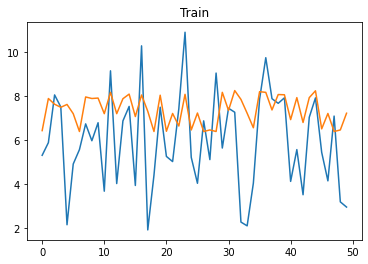

2/2 [==============================] - 0s 4ms/step


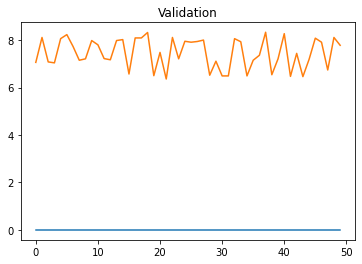

3/3 [==============================] - 0s 32ms/step


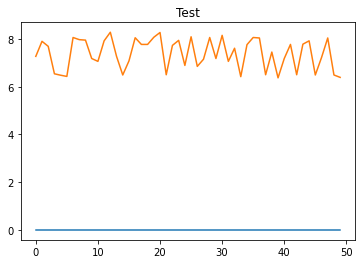

3/3 [==============================] - 0s 4ms/step


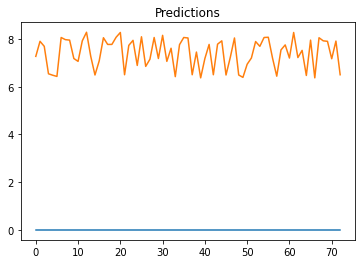

In [21]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
auto_cnn_mse

55.139311204603196

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 55.7067 - root_mean_squared_error: 7.4637

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 39s 4s/step - loss: 55.3144 - root_mean_squared_error: 7.4374 - val_loss: 52.8284 - val_root_mean_squared_error: 7.2683
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 53.1246 - root_mean_squared_error: 7.2887

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 52.4144 - root_mean_squared_error: 7.2398 - val_loss: 49.7105 - val_root_mean_squared_error: 7.0506
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 49.2169 - root_mean_squared_error: 7.0155

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 49.0760 - root_mean_squared_error: 7.0054 - val_loss: 46.6840 - val_root_mean_squared_error: 6.8326
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 46.5549 - root_mean_squared_error: 6.8231

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 46.2868 - root_mean_squared_error: 6.8034 - val_loss: 43.7465 - val_root_mean_squared_error: 6.6141
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 43.1275 - root_mean_squared_error: 6.5672

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 43.1275 - root_mean_squared_error: 6.5672 - val_loss: 40.8970 - val_root_mean_squared_error: 6.3951
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 40.5439 - root_mean_squared_error: 6.3674

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 40.5439 - root_mean_squared_error: 6.3674 - val_loss: 38.1470 - val_root_mean_squared_error: 6.1763
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 38.0983 - root_mean_squared_error: 6.1724

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 38.1797 - root_mean_squared_error: 6.1790 - val_loss: 35.4666 - val_root_mean_squared_error: 5.9554
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 35.1520 - root_mean_squared_error: 5.9289

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 35.1565 - root_mean_squared_error: 5.9293 - val_loss: 32.8179 - val_root_mean_squared_error: 5.7287
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 32.2614 - root_mean_squared_error: 5.6799

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 32.3561 - root_mean_squared_error: 5.6882 - val_loss: 30.2022 - val_root_mean_squared_error: 5.4957
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 29.5848 - root_mean_squared_error: 5.4392

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 29.5848 - root_mean_squared_error: 5.4392 - val_loss: 27.6809 - val_root_mean_squared_error: 5.2613
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 27.4429 - root_mean_squared_error: 5.2386

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 27.4285 - root_mean_squared_error: 5.2372 - val_loss: 25.0712 - val_root_mean_squared_error: 5.0071
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 24.9128 - root_mean_squared_error: 4.9913

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 24.9313 - root_mean_squared_error: 4.9931 - val_loss: 22.5874 - val_root_mean_squared_error: 4.7526
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 22.2571 - root_mean_squared_error: 4.7177

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 22.2400 - root_mean_squared_error: 4.7159 - val_loss: 20.3535 - val_root_mean_squared_error: 4.5115
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 19.5055 - root_mean_squared_error: 4.4165

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 19.5055 - root_mean_squared_error: 4.4165 - val_loss: 18.2655 - val_root_mean_squared_error: 4.2738
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 17.7684 - root_mean_squared_error: 4.2153

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 17.7684 - root_mean_squared_error: 4.2153 - val_loss: 16.2943 - val_root_mean_squared_error: 4.0366
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 16.5907 - root_mean_squared_error: 4.0732

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 16.2861 - root_mean_squared_error: 4.0356 - val_loss: 14.4548 - val_root_mean_squared_error: 3.8019
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 14.1767 - root_mean_squared_error: 3.7652

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 14.0962 - root_mean_squared_error: 3.7545 - val_loss: 12.7574 - val_root_mean_squared_error: 3.5717
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 12.4909 - root_mean_squared_error: 3.5342

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 12.5296 - root_mean_squared_error: 3.5397 - val_loss: 11.1973 - val_root_mean_squared_error: 3.3462
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 10.9032 - root_mean_squared_error: 3.3020

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 10.9001 - root_mean_squared_error: 3.3015 - val_loss: 9.7747 - val_root_mean_squared_error: 3.1264
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 9.8024 - root_mean_squared_error: 3.1309 

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 9.8302 - root_mean_squared_error: 3.1353 - val_loss: 8.4924 - val_root_mean_squared_error: 2.9142
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 8.7391 - root_mean_squared_error: 2.9562

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 8.6507 - root_mean_squared_error: 2.9412 - val_loss: 7.3393 - val_root_mean_squared_error: 2.7091
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 7.1562 - root_mean_squared_error: 2.6751

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 7.1950 - root_mean_squared_error: 2.6823 - val_loss: 6.3162 - val_root_mean_squared_error: 2.5132
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 6.0214 - root_mean_squared_error: 2.4538

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 6.0214 - root_mean_squared_error: 2.4538 - val_loss: 5.4258 - val_root_mean_squared_error: 2.3293
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 5.3232 - root_mean_squared_error: 2.3072

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 5.3232 - root_mean_squared_error: 2.3072 - val_loss: 4.6587 - val_root_mean_squared_error: 2.1584
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 5.1853 - root_mean_squared_error: 2.2771

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 5.1914 - root_mean_squared_error: 2.2785 - val_loss: 3.9878 - val_root_mean_squared_error: 1.9969
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 4.1990 - root_mean_squared_error: 2.0492

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 4.1990 - root_mean_squared_error: 2.0492 - val_loss: 3.4119 - val_root_mean_squared_error: 1.8471
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 3.5798 - root_mean_squared_error: 1.8920

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 3.5798 - root_mean_squared_error: 1.8920 - val_loss: 2.9213 - val_root_mean_squared_error: 1.7092
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 3.2550 - root_mean_squared_error: 1.8042

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 4s/step - loss: 3.2550 - root_mean_squared_error: 1.8042 - val_loss: 2.5049 - val_root_mean_squared_error: 1.5827
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2.8803 - root_mean_squared_error: 1.6971

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2.8803 - root_mean_squared_error: 1.6971 - val_loss: 2.1529 - val_root_mean_squared_error: 1.4673
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2.5193 - root_mean_squared_error: 1.5872

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2.5193 - root_mean_squared_error: 1.5872 - val_loss: 1.8587 - val_root_mean_squared_error: 1.3633
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2.1667 - root_mean_squared_error: 1.4720

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2.1526 - root_mean_squared_error: 1.4672 - val_loss: 1.6138 - val_root_mean_squared_error: 1.2704
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 1.7662 - root_mean_squared_error: 1.3290

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.7641 - root_mean_squared_error: 1.3282 - val_loss: 1.4084 - val_root_mean_squared_error: 1.1868
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 1.7439 - root_mean_squared_error: 1.3206

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 1.6742 - root_mean_squared_error: 1.2939 - val_loss: 1.2348 - val_root_mean_squared_error: 1.1112
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3656 - root_mean_squared_error: 1.1686

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 1.4104 - root_mean_squared_error: 1.1876 - val_loss: 1.0919 - val_root_mean_squared_error: 1.0450
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4313 - root_mean_squared_error: 1.1964

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 1.4187 - root_mean_squared_error: 1.1911 - val_loss: 0.9664 - val_root_mean_squared_error: 0.9831
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.3085 - root_mean_squared_error: 1.1439

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1.3085 - root_mean_squared_error: 1.1439 - val_loss: 0.8622 - val_root_mean_squared_error: 0.9286
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2453 - root_mean_squared_error: 1.1159

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 1.2289 - root_mean_squared_error: 1.1086 - val_loss: 0.7783 - val_root_mean_squared_error: 0.8822
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 1.0735 - root_mean_squared_error: 1.0361

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 1.0712 - root_mean_squared_error: 1.0350 - val_loss: 0.7071 - val_root_mean_squared_error: 0.8409
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 0.9692 - root_mean_squared_error: 0.9845

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.9692 - root_mean_squared_error: 0.9845 - val_loss: 0.6504 - val_root_mean_squared_error: 0.8064
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1404 - root_mean_squared_error: 1.0679

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 1.0808 - root_mean_squared_error: 1.0396 - val_loss: 0.5996 - val_root_mean_squared_error: 0.7743
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8980 - root_mean_squared_error: 0.9476

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.8310 - root_mean_squared_error: 0.9116 - val_loss: 0.5597 - val_root_mean_squared_error: 0.7482
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 0.9060 - root_mean_squared_error: 0.9518

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 0.9038 - root_mean_squared_error: 0.9507 - val_loss: 0.5277 - val_root_mean_squared_error: 0.7264
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 0.8772 - root_mean_squared_error: 0.9366

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 0.8467 - root_mean_squared_error: 0.9201 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7060
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8444 - root_mean_squared_error: 0.9189

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 0.8372 - root_mean_squared_error: 0.9150 - val_loss: 0.4723 - val_root_mean_squared_error: 0.6873
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 0.7464 - root_mean_squared_error: 0.8640

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 0.7464 - root_mean_squared_error: 0.8640 - val_loss: 0.4537 - val_root_mean_squared_error: 0.6736
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7549 - root_mean_squared_error: 0.8688

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 0.7273 - root_mean_squared_error: 0.8528 - val_loss: 0.4379 - val_root_mean_squared_error: 0.6617
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.7137 - root_mean_squared_error: 0.8448

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 0.7137 - root_mean_squared_error: 0.8448 - val_loss: 0.4248 - val_root_mean_squared_error: 0.6518
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 0.8040 - root_mean_squared_error: 0.8967

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 0.7985 - root_mean_squared_error: 0.8936 - val_loss: 0.4134 - val_root_mean_squared_error: 0.6430
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 0.7667 - root_mean_squared_error: 0.8756

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 0.7620 - root_mean_squared_error: 0.8729 - val_loss: 0.4049 - val_root_mean_squared_error: 0.6363
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 0.6685 - root_mean_squared_error: 0.8176

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 20ms/step


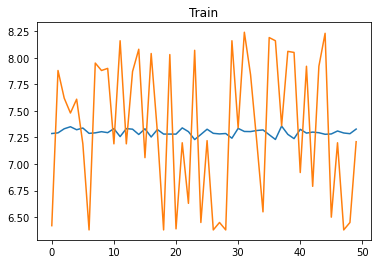

2/2 [==============================] - 2s 7ms/step


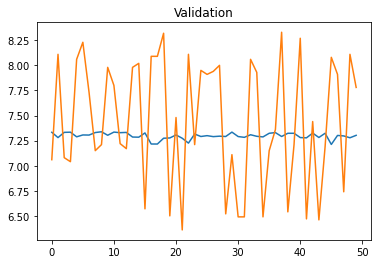

3/3 [==============================] - 2s 819ms/step


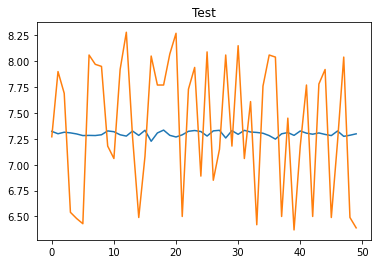

3/3 [==============================] - 0s 8ms/step


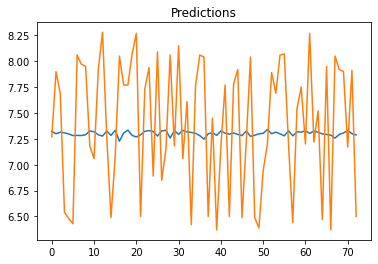

In [23]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [24]:
auto_gru_mse

0.3942677463165907

### LSTM

Epoch 1/50
4/8 [==============>...............] - ETA: 0s - loss: 65.4575 - root_mean_squared_error: 8.0906  

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 52s 5s/step - loss: 64.6945 - root_mean_squared_error: 8.0433 - val_loss: 62.1567 - val_root_mean_squared_error: 7.8840
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 63.3460 - root_mean_squared_error: 7.9590

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 63.3460 - root_mean_squared_error: 7.9590 - val_loss: 60.9585 - val_root_mean_squared_error: 7.8076
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 62.2296 - root_mean_squared_error: 7.8886

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 62.2054 - root_mean_squared_error: 7.8870 - val_loss: 60.3460 - val_root_mean_squared_error: 7.7683
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 60.9123 - root_mean_squared_error: 7.8046

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 60.9123 - root_mean_squared_error: 7.8046 - val_loss: 59.7332 - val_root_mean_squared_error: 7.7287
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 60.0090 - root_mean_squared_error: 7.7466

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 60.1679 - root_mean_squared_error: 7.7568 - val_loss: 59.0952 - val_root_mean_squared_error: 7.6873
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 58.9688 - root_mean_squared_error: 7.6791

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 58.9936 - root_mean_squared_error: 7.6807 - val_loss: 58.1254 - val_root_mean_squared_error: 7.6240
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 58.3047 - root_mean_squared_error: 7.6358

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 58.1109 - root_mean_squared_error: 7.6230 - val_loss: 56.9285 - val_root_mean_squared_error: 7.5451
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 57.0050 - root_mean_squared_error: 7.5502

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 56.9856 - root_mean_squared_error: 7.5489 - val_loss: 55.6565 - val_root_mean_squared_error: 7.4603
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 55.7158 - root_mean_squared_error: 7.4643

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 55.7158 - root_mean_squared_error: 7.4643 - val_loss: 54.2639 - val_root_mean_squared_error: 7.3664
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 54.3156 - root_mean_squared_error: 7.3699

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 54.2675 - root_mean_squared_error: 7.3666 - val_loss: 52.6564 - val_root_mean_squared_error: 7.2565
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 53.0389 - root_mean_squared_error: 7.2828

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 53.0049 - root_mean_squared_error: 7.2804 - val_loss: 50.9220 - val_root_mean_squared_error: 7.1360
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 51.6386 - root_mean_squared_error: 7.1860

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 51.5799 - root_mean_squared_error: 7.1819 - val_loss: 49.2933 - val_root_mean_squared_error: 7.0209
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 49.7853 - root_mean_squared_error: 7.0559

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 49.7853 - root_mean_squared_error: 7.0559 - val_loss: 47.6613 - val_root_mean_squared_error: 6.9037
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 48.3713 - root_mean_squared_error: 6.9549

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 48.3114 - root_mean_squared_error: 6.9506 - val_loss: 46.0376 - val_root_mean_squared_error: 6.7851
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 47.1443 - root_mean_squared_error: 6.8662

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 47.0838 - root_mean_squared_error: 6.8618 - val_loss: 44.3538 - val_root_mean_squared_error: 6.6599
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 45.0031 - root_mean_squared_error: 6.7084

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 45.0031 - root_mean_squared_error: 6.7084 - val_loss: 42.7202 - val_root_mean_squared_error: 6.5361
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 43.6218 - root_mean_squared_error: 6.6047

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 43.2362 - root_mean_squared_error: 6.5754 - val_loss: 41.0929 - val_root_mean_squared_error: 6.4104
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 41.3630 - root_mean_squared_error: 6.4314

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 41.3580 - root_mean_squared_error: 6.4310 - val_loss: 39.3409 - val_root_mean_squared_error: 6.2722
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 39.7097 - root_mean_squared_error: 6.3016

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 39.6964 - root_mean_squared_error: 6.3005 - val_loss: 37.5869 - val_root_mean_squared_error: 6.1308
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 37.7518 - root_mean_squared_error: 6.1442

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 37.7270 - root_mean_squared_error: 6.1422 - val_loss: 35.9950 - val_root_mean_squared_error: 5.9996
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 36.2592 - root_mean_squared_error: 6.0216

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 36.3216 - root_mean_squared_error: 6.0267 - val_loss: 34.4030 - val_root_mean_squared_error: 5.8654
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 34.4984 - root_mean_squared_error: 5.8735

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 34.5682 - root_mean_squared_error: 5.8795 - val_loss: 32.8111 - val_root_mean_squared_error: 5.7281
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 32.9006 - root_mean_squared_error: 5.7359

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 32.8382 - root_mean_squared_error: 5.7305 - val_loss: 31.2730 - val_root_mean_squared_error: 5.5922
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 31.0229 - root_mean_squared_error: 5.5698

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 31.2263 - root_mean_squared_error: 5.5880 - val_loss: 29.6934 - val_root_mean_squared_error: 5.4492
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 30.0190 - root_mean_squared_error: 5.4790

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 30.0213 - root_mean_squared_error: 5.4792 - val_loss: 28.1367 - val_root_mean_squared_error: 5.3044
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 28.1965 - root_mean_squared_error: 5.3100

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 28.1115 - root_mean_squared_error: 5.3020 - val_loss: 26.6241 - val_root_mean_squared_error: 5.1599
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 26.9506 - root_mean_squared_error: 5.1914

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 26.9506 - root_mean_squared_error: 5.1914 - val_loss: 25.1351 - val_root_mean_squared_error: 5.0135
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 25.1796 - root_mean_squared_error: 5.0179

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 25.1796 - root_mean_squared_error: 5.0179 - val_loss: 23.6902 - val_root_mean_squared_error: 4.8673
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 23.9260 - root_mean_squared_error: 4.8914

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 23.9260 - root_mean_squared_error: 4.8914 - val_loss: 22.2598 - val_root_mean_squared_error: 4.7180
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 22.4495 - root_mean_squared_error: 4.7381

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 22.2170 - root_mean_squared_error: 4.7135 - val_loss: 20.8458 - val_root_mean_squared_error: 4.5657
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 21.1106 - root_mean_squared_error: 4.5946

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 21.0931 - root_mean_squared_error: 4.5927 - val_loss: 19.4140 - val_root_mean_squared_error: 4.4061
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 19.5742 - root_mean_squared_error: 4.4243

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 19.5742 - root_mean_squared_error: 4.4243 - val_loss: 18.0736 - val_root_mean_squared_error: 4.2513
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 18.7524 - root_mean_squared_error: 4.3304

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 18.6745 - root_mean_squared_error: 4.3214 - val_loss: 16.8657 - val_root_mean_squared_error: 4.1068
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 17.1599 - root_mean_squared_error: 4.1424

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 17.1599 - root_mean_squared_error: 4.1424 - val_loss: 15.7202 - val_root_mean_squared_error: 3.9649
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 16.0254 - root_mean_squared_error: 4.0032

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 16.0254 - root_mean_squared_error: 4.0032 - val_loss: 14.6205 - val_root_mean_squared_error: 3.8237
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 15.0787 - root_mean_squared_error: 3.8831

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 15.0787 - root_mean_squared_error: 3.8831 - val_loss: 13.5306 - val_root_mean_squared_error: 3.6784
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 13.6072 - root_mean_squared_error: 3.6888

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 13.6072 - root_mean_squared_error: 3.6888 - val_loss: 12.5120 - val_root_mean_squared_error: 3.5372
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 12.7501 - root_mean_squared_error: 3.5707

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 12.7687 - root_mean_squared_error: 3.5733 - val_loss: 11.5735 - val_root_mean_squared_error: 3.4020
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 11.8054 - root_mean_squared_error: 3.4359

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 11.8054 - root_mean_squared_error: 3.4359 - val_loss: 10.6638 - val_root_mean_squared_error: 3.2655
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 10.9033 - root_mean_squared_error: 3.3020

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 10.9033 - root_mean_squared_error: 3.3020 - val_loss: 9.8029 - val_root_mean_squared_error: 3.1310
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 10.2645 - root_mean_squared_error: 3.2038

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 10.2794 - root_mean_squared_error: 3.2061 - val_loss: 8.9989 - val_root_mean_squared_error: 2.9998
Epoch 42/50
4/8 [==============>...............] - ETA: 0s - loss: 8.8462 - root_mean_squared_error: 2.9743

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 8.9797 - root_mean_squared_error: 2.9966 - val_loss: 8.2141 - val_root_mean_squared_error: 2.8660
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 8.9612 - root_mean_squared_error: 2.9935

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 8.9447 - root_mean_squared_error: 2.9908 - val_loss: 7.5401 - val_root_mean_squared_error: 2.7459
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 7.7921 - root_mean_squared_error: 2.7914

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 7.7583 - root_mean_squared_error: 2.7854 - val_loss: 6.9357 - val_root_mean_squared_error: 2.6336
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 7.3560 - root_mean_squared_error: 2.7122

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 7.3560 - root_mean_squared_error: 2.7122 - val_loss: 6.3791 - val_root_mean_squared_error: 2.5257
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 6.6588 - root_mean_squared_error: 2.5805

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 6.6588 - root_mean_squared_error: 2.5805 - val_loss: 5.8563 - val_root_mean_squared_error: 2.4200
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 6.5596 - root_mean_squared_error: 2.5612

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 6.5596 - root_mean_squared_error: 2.5612 - val_loss: 5.3678 - val_root_mean_squared_error: 2.3169
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 5.5903 - root_mean_squared_error: 2.3644

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 5.6376 - root_mean_squared_error: 2.3744 - val_loss: 4.9010 - val_root_mean_squared_error: 2.2138
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 5.8284 - root_mean_squared_error: 2.4142

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 5.8278 - root_mean_squared_error: 2.4141 - val_loss: 4.4649 - val_root_mean_squared_error: 2.1130
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 4.8904 - root_mean_squared_error: 2.2114

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 10ms/step


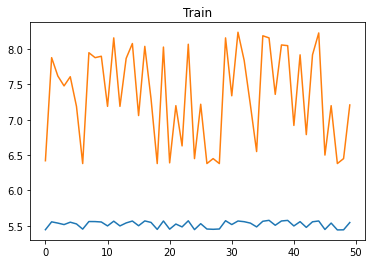

2/2 [==============================] - 6s 12ms/step


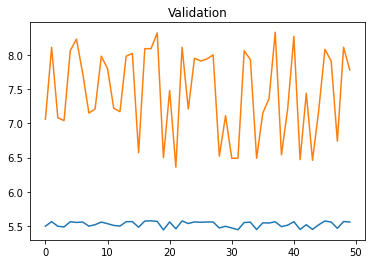

3/3 [==============================] - 0s 6ms/step


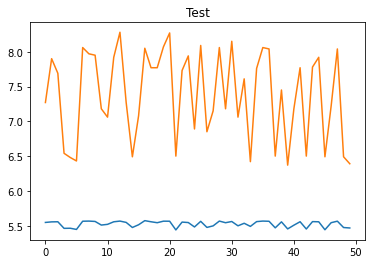

3/3 [==============================] - 2s 748ms/step


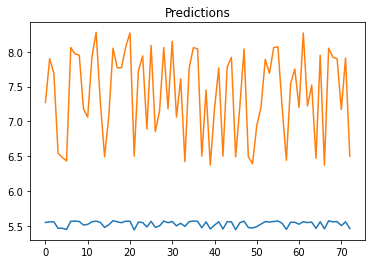

In [25]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [26]:
auto_lstm_mse

3.848678171559711

### RNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 69.1517 - root_mean_squared_error: 8.3157 INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 2s/step - loss: 69.1533 - root_mean_squared_error: 8.3158 - val_loss: 63.2690 - val_root_mean_squared_error: 7.9542
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 62.8703 - root_mean_squared_error: 7.9291INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 62.8495 - root_mean_squared_error: 7.9278 - val_loss: 58.4502 - val_root_mean_squared_error: 7.6453
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 58.9037 - root_mean_squared_error: 7.6749INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 58.4317 - root_mean_squared_error: 7.6441 - val_loss: 53.8692 - val_root_mean_squared_error: 7.3396
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 53.7341 - root_mean_squared_error: 7.3304INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 53.9428 - root_mean_squared_error: 7.3446 - val_loss: 49.5392 - val_root_mean_squared_error: 7.0384
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 48.4785 - root_mean_squared_error: 6.9627INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 48.7731 - root_mean_squared_error: 6.9838 - val_loss: 45.4328 - val_root_mean_squared_error: 6.7404
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 44.5378 - root_mean_squared_error: 6.6737INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 44.5378 - root_mean_squared_error: 6.6737 - val_loss: 41.5598 - val_root_mean_squared_error: 6.4467
Epoch 7/50
4/8 [==============>...............] - ETA: 0s - loss: 42.2768 - root_mean_squared_error: 6.5021INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 41.3193 - root_mean_squared_error: 6.4280 - val_loss: 37.8907 - val_root_mean_squared_error: 6.1555
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 38.7639 - root_mean_squared_error: 6.2261INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 37.7893 - root_mean_squared_error: 6.1473 - val_loss: 34.4582 - val_root_mean_squared_error: 5.8701
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 35.3235 - root_mean_squared_error: 5.9434INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 34.6432 - root_mean_squared_error: 5.8858 - val_loss: 31.2440 - val_root_mean_squared_error: 5.5896
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 30.8352 - root_mean_squared_error: 5.5529INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 30.6823 - root_mean_squared_error: 5.5392 - val_loss: 28.2625 - val_root_mean_squared_error: 5.3162
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 28.5916 - root_mean_squared_error: 5.3471INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 28.6059 - root_mean_squared_error: 5.3485 - val_loss: 25.4729 - val_root_mean_squared_error: 5.0471
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 26.6819 - root_mean_squared_error: 5.1655INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 26.2481 - root_mean_squared_error: 5.1233 - val_loss: 22.8565 - val_root_mean_squared_error: 4.7809
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 22.7941 - root_mean_squared_error: 4.7743INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 22.8387 - root_mean_squared_error: 4.7790 - val_loss: 20.4648 - val_root_mean_squared_error: 4.5238
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 21.1840 - root_mean_squared_error: 4.6026INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 21.1513 - root_mean_squared_error: 4.5991 - val_loss: 18.2509 - val_root_mean_squared_error: 4.2721
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 18.4153 - root_mean_squared_error: 4.2913INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 18.3455 - root_mean_squared_error: 4.2832 - val_loss: 16.2221 - val_root_mean_squared_error: 4.0277
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 15.7742 - root_mean_squared_error: 3.9717INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 15.7240 - root_mean_squared_error: 3.9653 - val_loss: 14.3859 - val_root_mean_squared_error: 3.7929
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 14.8517 - root_mean_squared_error: 3.8538INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 14.7636 - root_mean_squared_error: 3.8423 - val_loss: 12.6872 - val_root_mean_squared_error: 3.5619
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 13.5962 - root_mean_squared_error: 3.6873INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 13.3665 - root_mean_squared_error: 3.6560 - val_loss: 11.1506 - val_root_mean_squared_error: 3.3392
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 11.2073 - root_mean_squared_error: 3.3477INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 11.2073 - root_mean_squared_error: 3.3477 - val_loss: 9.7759 - val_root_mean_squared_error: 3.1266
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 10.4453 - root_mean_squared_error: 3.2319INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 10.5075 - root_mean_squared_error: 3.2415 - val_loss: 8.5404 - val_root_mean_squared_error: 2.9224
Epoch 21/50
5/8 [=================>............] - ETA: 0s - loss: 8.6791 - root_mean_squared_error: 2.9460INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 8.7820 - root_mean_squared_error: 2.9634 - val_loss: 7.4278 - val_root_mean_squared_error: 2.7254
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 7.9305 - root_mean_squared_error: 2.8161INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 7.9305 - root_mean_squared_error: 2.8161 - val_loss: 6.4481 - val_root_mean_squared_error: 2.5393
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 7.3188 - root_mean_squared_error: 2.7053INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 7.2028 - root_mean_squared_error: 2.6838 - val_loss: 5.5927 - val_root_mean_squared_error: 2.3649
Epoch 24/50
4/8 [==============>...............] - ETA: 0s - loss: 6.2427 - root_mean_squared_error: 2.4985INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 851ms/step - loss: 6.1951 - root_mean_squared_error: 2.4890 - val_loss: 4.8503 - val_root_mean_squared_error: 2.2023
Epoch 25/50
4/8 [==============>...............] - ETA: 0s - loss: 5.6169 - root_mean_squared_error: 2.3700INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 5.2431 - root_mean_squared_error: 2.2898 - val_loss: 4.2159 - val_root_mean_squared_error: 2.0533
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 4.7846 - root_mean_squared_error: 2.1874INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 4.5297 - root_mean_squared_error: 2.1283 - val_loss: 3.6843 - val_root_mean_squared_error: 1.9195
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 4.2896 - root_mean_squared_error: 2.0711INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 4.2636 - root_mean_squared_error: 2.0649 - val_loss: 3.2252 - val_root_mean_squared_error: 1.7959
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 3.7965 - root_mean_squared_error: 1.9485INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 3.8679 - root_mean_squared_error: 1.9667 - val_loss: 2.8315 - val_root_mean_squared_error: 1.6827
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3504 - root_mean_squared_error: 1.8304INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 3.3141 - root_mean_squared_error: 1.8205 - val_loss: 2.4951 - val_root_mean_squared_error: 1.5796
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 2.9576 - root_mean_squared_error: 1.7198INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 3.0205 - root_mean_squared_error: 1.7380 - val_loss: 2.2082 - val_root_mean_squared_error: 1.4860
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2.8194 - root_mean_squared_error: 1.6791INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2.7206 - root_mean_squared_error: 1.6494 - val_loss: 1.9552 - val_root_mean_squared_error: 1.3983
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2.7155 - root_mean_squared_error: 1.6479INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2.6738 - root_mean_squared_error: 1.6352 - val_loss: 1.7430 - val_root_mean_squared_error: 1.3202
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2.7813 - root_mean_squared_error: 1.6677INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2.8207 - root_mean_squared_error: 1.6795 - val_loss: 1.5539 - val_root_mean_squared_error: 1.2466
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2.3778 - root_mean_squared_error: 1.5420INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2.3778 - root_mean_squared_error: 1.5420 - val_loss: 1.3893 - val_root_mean_squared_error: 1.1787
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2.4083 - root_mean_squared_error: 1.5519INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2.4352 - root_mean_squared_error: 1.5605 - val_loss: 1.2456 - val_root_mean_squared_error: 1.1161
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8736 - root_mean_squared_error: 1.3688INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.9482 - root_mean_squared_error: 1.3958 - val_loss: 1.1200 - val_root_mean_squared_error: 1.0583
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2.0113 - root_mean_squared_error: 1.4182INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.9683 - root_mean_squared_error: 1.4030 - val_loss: 1.0126 - val_root_mean_squared_error: 1.0063
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 1.6531 - root_mean_squared_error: 1.2857INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.6599 - root_mean_squared_error: 1.2884 - val_loss: 0.9211 - val_root_mean_squared_error: 0.9597
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 1.8212 - root_mean_squared_error: 1.3495INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 879ms/step - loss: 1.8212 - root_mean_squared_error: 1.3495 - val_loss: 0.8471 - val_root_mean_squared_error: 0.9204
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 1.8075 - root_mean_squared_error: 1.3444INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2.1384 - root_mean_squared_error: 1.4623 - val_loss: 0.7806 - val_root_mean_squared_error: 0.8835
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 1.6732 - root_mean_squared_error: 1.2935INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.6332 - root_mean_squared_error: 1.2780 - val_loss: 0.7180 - val_root_mean_squared_error: 0.8473
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 1.7679 - root_mean_squared_error: 1.3296INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.7679 - root_mean_squared_error: 1.3296 - val_loss: 0.6641 - val_root_mean_squared_error: 0.8149
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 1.5737 - root_mean_squared_error: 1.2545INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.5815 - root_mean_squared_error: 1.2576 - val_loss: 0.6220 - val_root_mean_squared_error: 0.7887
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 1.2340 - root_mean_squared_error: 1.1108INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.4026 - root_mean_squared_error: 1.1843 - val_loss: 0.5858 - val_root_mean_squared_error: 0.7654
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 1.2321 - root_mean_squared_error: 1.1100INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 24s 3s/step - loss: 1.2321 - root_mean_squared_error: 1.1100 - val_loss: 0.5554 - val_root_mean_squared_error: 0.7453
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 1.4511 - root_mean_squared_error: 1.2046INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.4511 - root_mean_squared_error: 1.2046 - val_loss: 0.5277 - val_root_mean_squared_error: 0.7265
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3006 - root_mean_squared_error: 1.1404INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.2360 - root_mean_squared_error: 1.1117 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7112
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 1.2976 - root_mean_squared_error: 1.1391INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 1.2877 - root_mean_squared_error: 1.1348 - val_loss: 0.4857 - val_root_mean_squared_error: 0.6969
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 1.5664 - root_mean_squared_error: 1.2516INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1.5041 - root_mean_squared_error: 1.2264 - val_loss: 0.4673 - val_root_mean_squared_error: 0.6836
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 1.4122 - root_mean_squared_error: 1.1884INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 2s 5ms/step


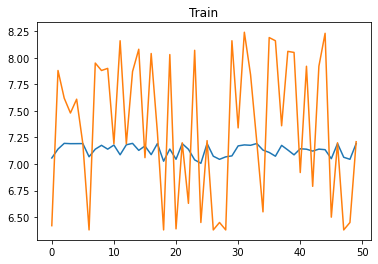

2/2 [==============================] - 1s 6ms/step


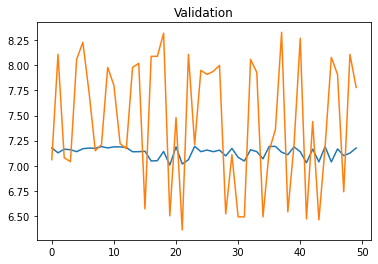

3/3 [==============================] - 0s 4ms/step


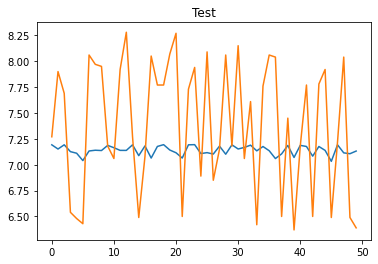

3/3 [==============================] - 0s 21ms/step


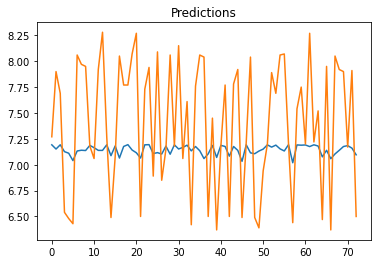

In [27]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [28]:
auto_rnn_mse

0.4246769879349007

# Moving Average with Encoder

### CNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 17527.8477 - root_mean_squared_error: 132.3928

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 15s 1s/step - loss: 17527.8477 - root_mean_squared_error: 132.3928 - val_loss: 582.3190 - val_root_mean_squared_error: 24.1313
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 11508.1689 - root_mean_squared_error: 107.2761

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 11345.4062 - root_mean_squared_error: 106.5148 - val_loss: 55.9304 - val_root_mean_squared_error: 7.4787
Epoch 3/50
8/8 [==============================] - 0s 43ms/step - loss: 5369.0571 - root_mean_squared_error: 73.2738 - val_loss: 55.9348 - val_root_mean_squared_error: 7.4790
Epoch 4/50
8/8 [==============================] - 0s 28ms/step - loss: 3767.3308 - root_mean_squared_error: 61.3786 - val_loss: 55.9392 - val_root_mean_squared_error: 7.4793
Epoch 5/50
8/8 [==============================] - 0s 30ms/step - loss: 3873.2502 - root_mean_squared_error: 62.2354 - val_loss: 55.9424 - val_root_mean_squared_error: 7.4795
Epoch 6/50
8/8 [==============================] - 0s 39ms/step - loss: 2034.6495 - root_mean_squared_error: 45.1071 - val_loss: 55.9446 - val_root_mean_squared_error: 7.4796
Epoch 7/50
8/8 [==============================] - 0s 33ms/step - loss: 1719.2144 - root_mean_squared_error: 41.4634 - val_loss: 55.9475 - va

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 145.8265 - root_mean_squared_error: 12.0759 - val_loss: 55.9294 - val_root_mean_squared_error: 7.4786
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 177.4194 - root_mean_squared_error: 13.3199

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 176.7442 - root_mean_squared_error: 13.2945 - val_loss: 55.9250 - val_root_mean_squared_error: 7.4783
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 262.1417 - root_mean_squared_error: 16.1908

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 797ms/step - loss: 257.7224 - root_mean_squared_error: 16.0537 - val_loss: 55.9204 - val_root_mean_squared_error: 7.4780
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 163.6066 - root_mean_squared_error: 12.7909

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 709ms/step - loss: 164.8402 - root_mean_squared_error: 12.8390 - val_loss: 55.9153 - val_root_mean_squared_error: 7.4777
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 193.2067 - root_mean_squared_error: 13.8999

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 187.6622 - root_mean_squared_error: 13.6990 - val_loss: 55.9090 - val_root_mean_squared_error: 7.4772
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 110.5839 - root_mean_squared_error: 10.5159

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 712ms/step - loss: 109.5752 - root_mean_squared_error: 10.4678 - val_loss: 55.9035 - val_root_mean_squared_error: 7.4769
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 370.0184 - root_mean_squared_error: 19.2359

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 740ms/step - loss: 370.0976 - root_mean_squared_error: 19.2379 - val_loss: 55.8973 - val_root_mean_squared_error: 7.4764
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 145.1005 - root_mean_squared_error: 12.0458

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 605ms/step - loss: 207.7812 - root_mean_squared_error: 14.4146 - val_loss: 55.8916 - val_root_mean_squared_error: 7.4761
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 158.2937 - root_mean_squared_error: 12.5815

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 632ms/step - loss: 155.6212 - root_mean_squared_error: 12.4748 - val_loss: 55.8843 - val_root_mean_squared_error: 7.4756
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 140.3615 - root_mean_squared_error: 11.8474

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 693ms/step - loss: 140.3615 - root_mean_squared_error: 11.8474 - val_loss: 55.8777 - val_root_mean_squared_error: 7.4751
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 102.5086 - root_mean_squared_error: 10.1247

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 90.7393 - root_mean_squared_error: 9.5257 - val_loss: 55.8713 - val_root_mean_squared_error: 7.4747
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 70.4727 - root_mean_squared_error: 8.3948

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 68.1435 - root_mean_squared_error: 8.2549 - val_loss: 55.8642 - val_root_mean_squared_error: 7.4742
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 107.1800 - root_mean_squared_error: 10.3528

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 931ms/step - loss: 103.7330 - root_mean_squared_error: 10.1849 - val_loss: 55.8571 - val_root_mean_squared_error: 7.4738
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 107.7777 - root_mean_squared_error: 10.3816

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 91.7458 - root_mean_squared_error: 9.5784 - val_loss: 55.8498 - val_root_mean_squared_error: 7.4733
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 75.2302 - root_mean_squared_error: 8.6735

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 773ms/step - loss: 70.2975 - root_mean_squared_error: 8.3844 - val_loss: 55.8424 - val_root_mean_squared_error: 7.4728
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 93.9700 - root_mean_squared_error: 9.6938

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 93.2127 - root_mean_squared_error: 9.6547 - val_loss: 55.8349 - val_root_mean_squared_error: 7.4723
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 84.4743 - root_mean_squared_error: 9.1910

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 91.8452 - root_mean_squared_error: 9.5836 - val_loss: 55.8275 - val_root_mean_squared_error: 7.4718
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 88.1865 - root_mean_squared_error: 9.3908

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 97.8828 - root_mean_squared_error: 9.8936 - val_loss: 55.8202 - val_root_mean_squared_error: 7.4713
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 145.3251 - root_mean_squared_error: 12.0551

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 120.3494 - root_mean_squared_error: 10.9704 - val_loss: 55.8129 - val_root_mean_squared_error: 7.4708
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 77.4652 - root_mean_squared_error: 8.8014

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 791ms/step - loss: 74.2458 - root_mean_squared_error: 8.6166 - val_loss: 55.8054 - val_root_mean_squared_error: 7.4703
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 156.6511 - root_mean_squared_error: 12.5160

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 978ms/step - loss: 149.0091 - root_mean_squared_error: 12.2069 - val_loss: 55.7981 - val_root_mean_squared_error: 7.4698
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 87.1010 - root_mean_squared_error: 9.3328

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 865ms/step - loss: 87.1010 - root_mean_squared_error: 9.3328 - val_loss: 55.7904 - val_root_mean_squared_error: 7.4693
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 91.6768 - root_mean_squared_error: 9.5748

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 914ms/step - loss: 91.1919 - root_mean_squared_error: 9.5494 - val_loss: 55.7826 - val_root_mean_squared_error: 7.4688
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 63.6002 - root_mean_squared_error: 7.9750

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 26ms/step


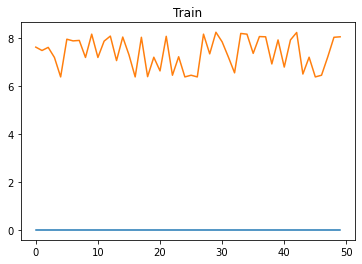

2/2 [==============================] - 2s 4ms/step


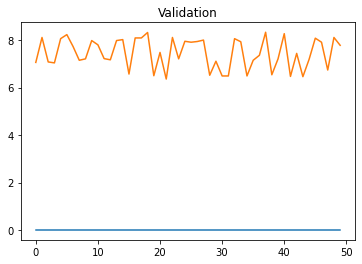

3/3 [==============================] - 0s 4ms/step


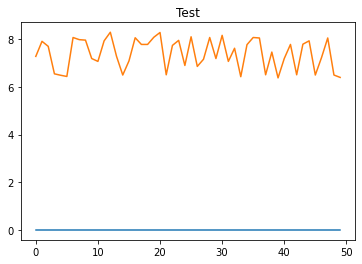

3/3 [==============================] - 0s 5ms/step


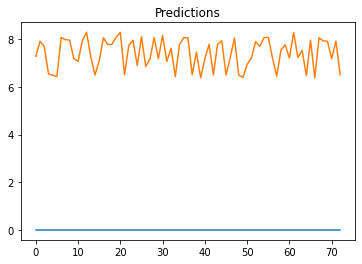

In [29]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [30]:
mavg_auto_cnn_mse

55.02489224999517

### RNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 37.7673 - root_mean_squared_error: 6.1455  INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 1s/step - loss: 37.8154 - root_mean_squared_error: 6.1494 - val_loss: 33.9470 - val_root_mean_squared_error: 5.8264
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 35.0679 - root_mean_squared_error: 5.9218INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 34.0256 - root_mean_squared_error: 5.8331 - val_loss: 30.5785 - val_root_mean_squared_error: 5.5298
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 30.9125 - root_mean_squared_error: 5.5599INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 30.5887 - root_mean_squared_error: 5.5307 - val_loss: 27.4780 - val_root_mean_squared_error: 5.2419
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 27.2748 - root_mean_squared_error: 5.2225INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 26.2637 - root_mean_squared_error: 5.1248 - val_loss: 24.6300 - val_root_mean_squared_error: 4.9629
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 24.4542 - root_mean_squared_error: 4.9451INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 24.3282 - root_mean_squared_error: 4.9324 - val_loss: 22.0583 - val_root_mean_squared_error: 4.6966
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 22.1178 - root_mean_squared_error: 4.7030INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 22.1263 - root_mean_squared_error: 4.7039 - val_loss: 19.7151 - val_root_mean_squared_error: 4.4402
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 19.4924 - root_mean_squared_error: 4.4150INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 19.4924 - root_mean_squared_error: 4.4150 - val_loss: 17.5760 - val_root_mean_squared_error: 4.1924
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 18.0582 - root_mean_squared_error: 4.2495INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 18.0582 - root_mean_squared_error: 4.2495 - val_loss: 15.6523 - val_root_mean_squared_error: 3.9563
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 16.1484 - root_mean_squared_error: 4.0185INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 16.1193 - root_mean_squared_error: 4.0149 - val_loss: 13.9205 - val_root_mean_squared_error: 3.7310
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 13.6593 - root_mean_squared_error: 3.6959INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 13.6593 - root_mean_squared_error: 3.6959 - val_loss: 12.3594 - val_root_mean_squared_error: 3.5156
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 12.9637 - root_mean_squared_error: 3.6005INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 12.9893 - root_mean_squared_error: 3.6041 - val_loss: 10.9374 - val_root_mean_squared_error: 3.3072
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 11.5419 - root_mean_squared_error: 3.3973INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 11.0424 - root_mean_squared_error: 3.3230 - val_loss: 9.6454 - val_root_mean_squared_error: 3.1057
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 9.9467 - root_mean_squared_error: 3.1538 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 964ms/step - loss: 9.8549 - root_mean_squared_error: 3.1393 - val_loss: 8.4925 - val_root_mean_squared_error: 2.9142
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 8.9653 - root_mean_squared_error: 2.9942INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 8.9547 - root_mean_squared_error: 2.9924 - val_loss: 7.4333 - val_root_mean_squared_error: 2.7264
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 7.6561 - root_mean_squared_error: 2.7670INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 7.5751 - root_mean_squared_error: 2.7523 - val_loss: 6.4881 - val_root_mean_squared_error: 2.5472
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 7.1509 - root_mean_squared_error: 2.6741INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 25s 4s/step - loss: 7.1684 - root_mean_squared_error: 2.6774 - val_loss: 5.6404 - val_root_mean_squared_error: 2.3750
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 6.6901 - root_mean_squared_error: 2.5865INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 6.6863 - root_mean_squared_error: 2.5858 - val_loss: 4.8543 - val_root_mean_squared_error: 2.2033
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 5.6938 - root_mean_squared_error: 2.3862INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 5.4538 - root_mean_squared_error: 2.3353 - val_loss: 4.1685 - val_root_mean_squared_error: 2.0417
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 4.8646 - root_mean_squared_error: 2.2056INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 4.8646 - root_mean_squared_error: 2.2056 - val_loss: 3.5685 - val_root_mean_squared_error: 1.8891
Epoch 20/50
3/8 [==========>...................] - ETA: 0s - loss: 3.9721 - root_mean_squared_error: 1.9930INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 4.1237 - root_mean_squared_error: 2.0307 - val_loss: 3.0469 - val_root_mean_squared_error: 1.7455
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 3.4749 - root_mean_squared_error: 1.8641INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.4875 - root_mean_squared_error: 1.8675 - val_loss: 2.6077 - val_root_mean_squared_error: 1.6148
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3904 - root_mean_squared_error: 1.8413INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 3.3700 - root_mean_squared_error: 1.8357 - val_loss: 2.2321 - val_root_mean_squared_error: 1.4940
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 3.2299 - root_mean_squared_error: 1.7972INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 3.0291 - root_mean_squared_error: 1.7404 - val_loss: 1.9165 - val_root_mean_squared_error: 1.3844
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2.8297 - root_mean_squared_error: 1.6822INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2.8022 - root_mean_squared_error: 1.6740 - val_loss: 1.6494 - val_root_mean_squared_error: 1.2843
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2.3902 - root_mean_squared_error: 1.5460INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.3779 - root_mean_squared_error: 1.5420 - val_loss: 1.4177 - val_root_mean_squared_error: 1.1907
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2.4839 - root_mean_squared_error: 1.5760INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2.4839 - root_mean_squared_error: 1.5760 - val_loss: 1.2199 - val_root_mean_squared_error: 1.1045
Epoch 27/50
4/8 [==============>...............] - ETA: 0s - loss: 2.0370 - root_mean_squared_error: 1.4272INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 25s 4s/step - loss: 1.9534 - root_mean_squared_error: 1.3976 - val_loss: 1.0578 - val_root_mean_squared_error: 1.0285
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 1.9134 - root_mean_squared_error: 1.3833INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.8646 - root_mean_squared_error: 1.3655 - val_loss: 0.9207 - val_root_mean_squared_error: 0.9595
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 1.7679 - root_mean_squared_error: 1.3296INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.8695 - root_mean_squared_error: 1.3673 - val_loss: 0.8079 - val_root_mean_squared_error: 0.8988
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 1.9676 - root_mean_squared_error: 1.4027INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.7893 - root_mean_squared_error: 1.3376 - val_loss: 0.7140 - val_root_mean_squared_error: 0.8450
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4130 - root_mean_squared_error: 1.1887INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 1.4699 - root_mean_squared_error: 1.2124 - val_loss: 0.6441 - val_root_mean_squared_error: 0.8026
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 1.5147 - root_mean_squared_error: 1.2307INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.5147 - root_mean_squared_error: 1.2307 - val_loss: 0.5833 - val_root_mean_squared_error: 0.7637
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 1.4069 - root_mean_squared_error: 1.1861INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.4333 - root_mean_squared_error: 1.1972 - val_loss: 0.5303 - val_root_mean_squared_error: 0.7282
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3904 - root_mean_squared_error: 1.1791INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 1.4492 - root_mean_squared_error: 1.2038 - val_loss: 0.4845 - val_root_mean_squared_error: 0.6961
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 1.3499 - root_mean_squared_error: 1.1618INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 23s 3s/step - loss: 1.3114 - root_mean_squared_error: 1.1451 - val_loss: 0.4479 - val_root_mean_squared_error: 0.6693
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1.4798 - root_mean_squared_error: 1.2165INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.4798 - root_mean_squared_error: 1.2165 - val_loss: 0.4160 - val_root_mean_squared_error: 0.6450
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4467 - root_mean_squared_error: 1.2028INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 1.4620 - root_mean_squared_error: 1.2092 - val_loss: 0.3876 - val_root_mean_squared_error: 0.6225
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 1.3535 - root_mean_squared_error: 1.1634INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.3593 - root_mean_squared_error: 1.1659 - val_loss: 0.3628 - val_root_mean_squared_error: 0.6023
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 1.1407 - root_mean_squared_error: 1.0680INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.2956 - root_mean_squared_error: 1.1383 - val_loss: 0.3454 - val_root_mean_squared_error: 0.5877
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3128 - root_mean_squared_error: 1.1458INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.3074 - root_mean_squared_error: 1.1434 - val_loss: 0.3308 - val_root_mean_squared_error: 0.5751
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2924 - root_mean_squared_error: 1.1368INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.3293 - root_mean_squared_error: 1.1530 - val_loss: 0.3203 - val_root_mean_squared_error: 0.5659
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 1.2077 - root_mean_squared_error: 1.0989INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1.2348 - root_mean_squared_error: 1.1112 - val_loss: 0.3130 - val_root_mean_squared_error: 0.5594
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 1.3370 - root_mean_squared_error: 1.1563INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.3291 - root_mean_squared_error: 1.1529 - val_loss: 0.3071 - val_root_mean_squared_error: 0.5542
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 1.4101 - root_mean_squared_error: 1.1875INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 1.3890 - root_mean_squared_error: 1.1786 - val_loss: 0.2999 - val_root_mean_squared_error: 0.5477
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 1.1919 - root_mean_squared_error: 1.0918INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 980ms/step - loss: 1.2400 - root_mean_squared_error: 1.1135 - val_loss: 0.2944 - val_root_mean_squared_error: 0.5426
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 1.4058 - root_mean_squared_error: 1.1857INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 1.4058 - root_mean_squared_error: 1.1857 - val_loss: 0.2891 - val_root_mean_squared_error: 0.5377
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 1.3848 - root_mean_squared_error: 1.1768INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1.2499 - root_mean_squared_error: 1.1180 - val_loss: 0.2872 - val_root_mean_squared_error: 0.5359
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 1.1408 - root_mean_squared_error: 1.0681INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1.1712 - root_mean_squared_error: 1.0822 - val_loss: 0.2828 - val_root_mean_squared_error: 0.5317
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 1.3116 - root_mean_squared_error: 1.1453INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1.3116 - root_mean_squared_error: 1.1453 - val_loss: 0.2779 - val_root_mean_squared_error: 0.5272
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 1.2477 - root_mean_squared_error: 1.1170INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 6ms/step


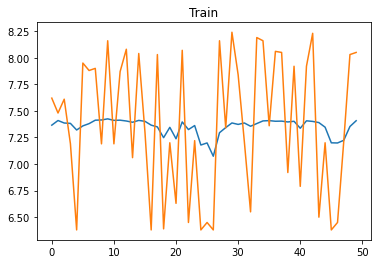

2/2 [==============================] - 1s 8ms/step


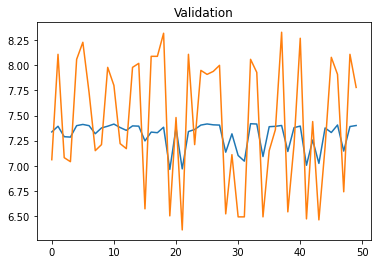

3/3 [==============================] - 0s 6ms/step


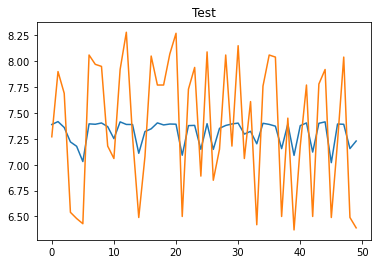

3/3 [==============================] - 0s 4ms/step


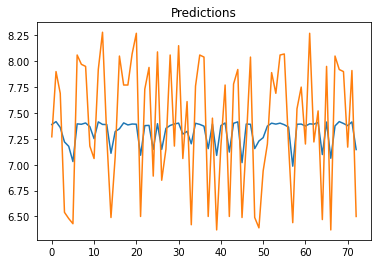

In [31]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [32]:
mavg_auto_rnn_mse

0.2730704677964636

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 77.2431 - root_mean_squared_error: 8.7888

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 65s 7s/step - loss: 76.4176 - root_mean_squared_error: 8.7417 - val_loss: 73.2350 - val_root_mean_squared_error: 8.5577
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 73.3817 - root_mean_squared_error: 8.5663

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 73.2198 - root_mean_squared_error: 8.5569 - val_loss: 70.2095 - val_root_mean_squared_error: 8.3791
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 69.9461 - root_mean_squared_error: 8.3634

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 69.9461 - root_mean_squared_error: 8.3634 - val_loss: 67.2935 - val_root_mean_squared_error: 8.2033
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 67.3402 - root_mean_squared_error: 8.2061

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 67.2443 - root_mean_squared_error: 8.2003 - val_loss: 64.4733 - val_root_mean_squared_error: 8.0295
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 64.3333 - root_mean_squared_error: 8.0208

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 64.3314 - root_mean_squared_error: 8.0207 - val_loss: 61.7269 - val_root_mean_squared_error: 7.8566
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 61.5636 - root_mean_squared_error: 7.8462

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 61.5636 - root_mean_squared_error: 7.8462 - val_loss: 59.0066 - val_root_mean_squared_error: 7.6816
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 58.6704 - root_mean_squared_error: 7.6597

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 58.6704 - root_mean_squared_error: 7.6597 - val_loss: 56.3036 - val_root_mean_squared_error: 7.5036
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 56.0285 - root_mean_squared_error: 7.4852

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 56.1576 - root_mean_squared_error: 7.4938 - val_loss: 53.6944 - val_root_mean_squared_error: 7.3276
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 53.5773 - root_mean_squared_error: 7.3197

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 53.5397 - root_mean_squared_error: 7.3171 - val_loss: 51.1437 - val_root_mean_squared_error: 7.1515
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 51.1467 - root_mean_squared_error: 7.1517

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 51.1467 - root_mean_squared_error: 7.1517 - val_loss: 48.6312 - val_root_mean_squared_error: 6.9736
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 48.1615 - root_mean_squared_error: 6.9398

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 48.1351 - root_mean_squared_error: 6.9379 - val_loss: 46.1562 - val_root_mean_squared_error: 6.7938
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 45.7586 - root_mean_squared_error: 6.7645

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 45.7586 - root_mean_squared_error: 6.7645 - val_loss: 43.6818 - val_root_mean_squared_error: 6.6092
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 43.3214 - root_mean_squared_error: 6.5819

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 43.2381 - root_mean_squared_error: 6.5756 - val_loss: 41.1880 - val_root_mean_squared_error: 6.4178
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 40.6634 - root_mean_squared_error: 6.3768

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 40.6634 - root_mean_squared_error: 6.3768 - val_loss: 38.6093 - val_root_mean_squared_error: 6.2136
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 37.6492 - root_mean_squared_error: 6.1359

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 37.6492 - root_mean_squared_error: 6.1359 - val_loss: 36.0989 - val_root_mean_squared_error: 6.0082
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 35.4038 - root_mean_squared_error: 5.9501

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 35.5204 - root_mean_squared_error: 5.9599 - val_loss: 33.6378 - val_root_mean_squared_error: 5.7998
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 33.3249 - root_mean_squared_error: 5.7728

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 33.3249 - root_mean_squared_error: 5.7728 - val_loss: 31.1745 - val_root_mean_squared_error: 5.5834
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 30.6986 - root_mean_squared_error: 5.5406

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 30.7837 - root_mean_squared_error: 5.5483 - val_loss: 28.7434 - val_root_mean_squared_error: 5.3613
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 28.2025 - root_mean_squared_error: 5.3106

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 28.2025 - root_mean_squared_error: 5.3106 - val_loss: 26.3488 - val_root_mean_squared_error: 5.1331
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 25.9169 - root_mean_squared_error: 5.0909

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 25.8587 - root_mean_squared_error: 5.0851 - val_loss: 23.9799 - val_root_mean_squared_error: 4.8969
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 23.3051 - root_mean_squared_error: 4.8275

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 23.2950 - root_mean_squared_error: 4.8265 - val_loss: 21.6446 - val_root_mean_squared_error: 4.6524
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 21.1936 - root_mean_squared_error: 4.6037

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 21.2107 - root_mean_squared_error: 4.6055 - val_loss: 19.3903 - val_root_mean_squared_error: 4.4034
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 19.3418 - root_mean_squared_error: 4.3979

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 19.3418 - root_mean_squared_error: 4.3979 - val_loss: 17.2334 - val_root_mean_squared_error: 4.1513
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 16.4760 - root_mean_squared_error: 4.0591

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 16.4760 - root_mean_squared_error: 4.0591 - val_loss: 15.1932 - val_root_mean_squared_error: 3.8978
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 15.0961 - root_mean_squared_error: 3.8854

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 15.0961 - root_mean_squared_error: 3.8854 - val_loss: 13.2899 - val_root_mean_squared_error: 3.6455
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 12.7493 - root_mean_squared_error: 3.5706

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 12.8544 - root_mean_squared_error: 3.5853 - val_loss: 11.5475 - val_root_mean_squared_error: 3.3982
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 11.2025 - root_mean_squared_error: 3.3470

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 11.2667 - root_mean_squared_error: 3.3566 - val_loss: 9.9612 - val_root_mean_squared_error: 3.1561
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 9.4899 - root_mean_squared_error: 3.0806

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 9.4899 - root_mean_squared_error: 3.0806 - val_loss: 8.5424 - val_root_mean_squared_error: 2.9227
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 8.5560 - root_mean_squared_error: 2.9251

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 8.4612 - root_mean_squared_error: 2.9088 - val_loss: 7.2874 - val_root_mean_squared_error: 2.6995
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 7.1083 - root_mean_squared_error: 2.6661

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 7.1069 - root_mean_squared_error: 2.6659 - val_loss: 6.1587 - val_root_mean_squared_error: 2.4817
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 5.9339 - root_mean_squared_error: 2.4360

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 5.9164 - root_mean_squared_error: 2.4324 - val_loss: 4.8563 - val_root_mean_squared_error: 2.2037
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 4.6071 - root_mean_squared_error: 2.1464

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 4.5648 - root_mean_squared_error: 2.1365 - val_loss: 4.0102 - val_root_mean_squared_error: 2.0025
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 4.2706 - root_mean_squared_error: 2.0665

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 4.2706 - root_mean_squared_error: 2.0665 - val_loss: 3.3879 - val_root_mean_squared_error: 1.8406
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 3.5029 - root_mean_squared_error: 1.8716

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 3.5029 - root_mean_squared_error: 1.8716 - val_loss: 2.8677 - val_root_mean_squared_error: 1.6934
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2.9718 - root_mean_squared_error: 1.7239

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2.9718 - root_mean_squared_error: 1.7239 - val_loss: 2.4329 - val_root_mean_squared_error: 1.5598
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2.5676 - root_mean_squared_error: 1.6024

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2.5676 - root_mean_squared_error: 1.6024 - val_loss: 2.0779 - val_root_mean_squared_error: 1.4415
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2.2466 - root_mean_squared_error: 1.4989

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2.1803 - root_mean_squared_error: 1.4766 - val_loss: 1.7727 - val_root_mean_squared_error: 1.3314
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2.0236 - root_mean_squared_error: 1.4225

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2.0575 - root_mean_squared_error: 1.4344 - val_loss: 1.5256 - val_root_mean_squared_error: 1.2352
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 1.8429 - root_mean_squared_error: 1.3575

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 1.9091 - root_mean_squared_error: 1.3817 - val_loss: 1.3243 - val_root_mean_squared_error: 1.1508
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 1.7004 - root_mean_squared_error: 1.3040

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 1.7039 - root_mean_squared_error: 1.3053 - val_loss: 1.1506 - val_root_mean_squared_error: 1.0727
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 1.4346 - root_mean_squared_error: 1.1977

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 1.4346 - root_mean_squared_error: 1.1977 - val_loss: 1.0008 - val_root_mean_squared_error: 1.0004
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 1.1609 - root_mean_squared_error: 1.0775

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 1.1609 - root_mean_squared_error: 1.0775 - val_loss: 0.8793 - val_root_mean_squared_error: 0.9377
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 1.0879 - root_mean_squared_error: 1.0430

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 1.0879 - root_mean_squared_error: 1.0430 - val_loss: 0.7819 - val_root_mean_squared_error: 0.8842
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 1.0538 - root_mean_squared_error: 1.0265

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 1.1266 - root_mean_squared_error: 1.0614 - val_loss: 0.7086 - val_root_mean_squared_error: 0.8418
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 0.9849 - root_mean_squared_error: 0.9924

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 0.9849 - root_mean_squared_error: 0.9924 - val_loss: 0.6499 - val_root_mean_squared_error: 0.8062
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 0.9359 - root_mean_squared_error: 0.9674

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.9359 - root_mean_squared_error: 0.9674 - val_loss: 0.6010 - val_root_mean_squared_error: 0.7753
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 0.8637 - root_mean_squared_error: 0.9294

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 0.8637 - root_mean_squared_error: 0.9294 - val_loss: 0.5601 - val_root_mean_squared_error: 0.7484
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.9680 - root_mean_squared_error: 0.9839

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 0.9680 - root_mean_squared_error: 0.9839 - val_loss: 0.5264 - val_root_mean_squared_error: 0.7255
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.8218 - root_mean_squared_error: 0.9065

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 0.8218 - root_mean_squared_error: 0.9065 - val_loss: 0.4997 - val_root_mean_squared_error: 0.7069
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 0.7362 - root_mean_squared_error: 0.8580

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 5s 12ms/step


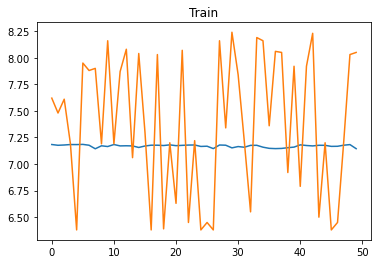

2/2 [==============================] - 2s 10ms/step


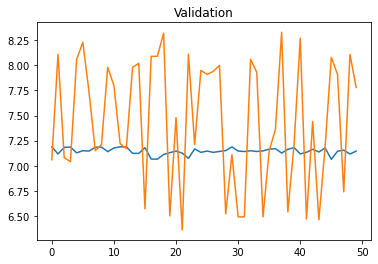

3/3 [==============================] - 0s 64ms/step


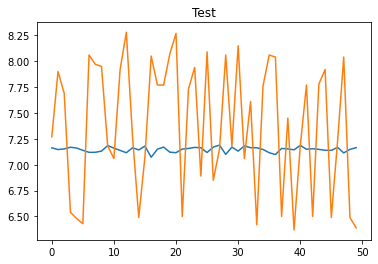

3/3 [==============================] - 0s 6ms/step


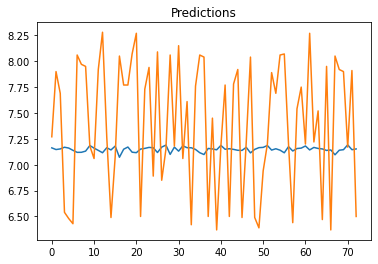

In [33]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
mavg_auto_gru_mse

0.4565835802755323

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 68.1589 - root_mean_squared_error: 8.2558

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 56s 6s/step - loss: 68.1328 - root_mean_squared_error: 8.2543 - val_loss: 66.4988 - val_root_mean_squared_error: 8.1547
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 66.7868 - root_mean_squared_error: 8.1723

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 66.6930 - root_mean_squared_error: 8.1666 - val_loss: 64.7755 - val_root_mean_squared_error: 8.0483
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 65.1207 - root_mean_squared_error: 8.0697

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 65.0388 - root_mean_squared_error: 8.0647 - val_loss: 63.0856 - val_root_mean_squared_error: 7.9426
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 63.5899 - root_mean_squared_error: 7.9743

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 63.5899 - root_mean_squared_error: 7.9743 - val_loss: 61.4100 - val_root_mean_squared_error: 7.8365
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 61.7674 - root_mean_squared_error: 7.8592

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 61.7674 - root_mean_squared_error: 7.8592 - val_loss: 59.7537 - val_root_mean_squared_error: 7.7301
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 59.8134 - root_mean_squared_error: 7.7339

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 59.8134 - root_mean_squared_error: 7.7339 - val_loss: 58.0931 - val_root_mean_squared_error: 7.6219
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 58.2423 - root_mean_squared_error: 7.6317

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 58.1255 - root_mean_squared_error: 7.6240 - val_loss: 56.3946 - val_root_mean_squared_error: 7.5096
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 56.5741 - root_mean_squared_error: 7.5216

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 56.5537 - root_mean_squared_error: 7.5202 - val_loss: 54.5711 - val_root_mean_squared_error: 7.3872
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 54.4746 - root_mean_squared_error: 7.3807

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 54.4233 - root_mean_squared_error: 7.3772 - val_loss: 52.2918 - val_root_mean_squared_error: 7.2313
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 51.9296 - root_mean_squared_error: 7.2062

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 51.9296 - root_mean_squared_error: 7.2062 - val_loss: 50.4048 - val_root_mean_squared_error: 7.0996
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 50.2722 - root_mean_squared_error: 7.0903

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 50.1650 - root_mean_squared_error: 7.0827 - val_loss: 48.6685 - val_root_mean_squared_error: 6.9763
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 48.5393 - root_mean_squared_error: 6.9670

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 48.5847 - root_mean_squared_error: 6.9703 - val_loss: 46.6668 - val_root_mean_squared_error: 6.8313
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 47.6764 - root_mean_squared_error: 6.9048

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 46.9793 - root_mean_squared_error: 6.8541 - val_loss: 44.6009 - val_root_mean_squared_error: 6.6784
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 44.3105 - root_mean_squared_error: 6.6566

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 44.3105 - root_mean_squared_error: 6.6566 - val_loss: 42.7999 - val_root_mean_squared_error: 6.5422
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 42.0891 - root_mean_squared_error: 6.4876

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 42.4283 - root_mean_squared_error: 6.5137 - val_loss: 41.2216 - val_root_mean_squared_error: 6.4204
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 40.6817 - root_mean_squared_error: 6.3782

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 40.6865 - root_mean_squared_error: 6.3786 - val_loss: 39.6730 - val_root_mean_squared_error: 6.2987
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 39.8010 - root_mean_squared_error: 6.3088

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 39.8010 - root_mean_squared_error: 6.3088 - val_loss: 38.1475 - val_root_mean_squared_error: 6.1764
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 37.9497 - root_mean_squared_error: 6.1603

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 37.9497 - root_mean_squared_error: 6.1603 - val_loss: 36.5948 - val_root_mean_squared_error: 6.0494
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 36.3496 - root_mean_squared_error: 6.0291

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 36.3899 - root_mean_squared_error: 6.0324 - val_loss: 34.9358 - val_root_mean_squared_error: 5.9106
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 35.1191 - root_mean_squared_error: 5.9261

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 35.1019 - root_mean_squared_error: 5.9247 - val_loss: 32.9835 - val_root_mean_squared_error: 5.7431
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 33.1130 - root_mean_squared_error: 5.7544

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 32.7594 - root_mean_squared_error: 5.7236 - val_loss: 31.2645 - val_root_mean_squared_error: 5.5915
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 31.2609 - root_mean_squared_error: 5.5911

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 31.1497 - root_mean_squared_error: 5.5812 - val_loss: 29.6175 - val_root_mean_squared_error: 5.4422
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 30.8508 - root_mean_squared_error: 5.5544

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 30.0974 - root_mean_squared_error: 5.4861 - val_loss: 27.9310 - val_root_mean_squared_error: 5.2850
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 28.0635 - root_mean_squared_error: 5.2975

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 28.0635 - root_mean_squared_error: 5.2975 - val_loss: 26.1254 - val_root_mean_squared_error: 5.1113
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 26.3876 - root_mean_squared_error: 5.1369

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 26.1392 - root_mean_squared_error: 5.1127 - val_loss: 24.4703 - val_root_mean_squared_error: 4.9468
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 25.0193 - root_mean_squared_error: 5.0019

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 25.0193 - root_mean_squared_error: 5.0019 - val_loss: 22.8502 - val_root_mean_squared_error: 4.7802
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 22.9744 - root_mean_squared_error: 4.7932

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 22.9744 - root_mean_squared_error: 4.7932 - val_loss: 21.3472 - val_root_mean_squared_error: 4.6203
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 21.6217 - root_mean_squared_error: 4.6499

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 21.4570 - root_mean_squared_error: 4.6322 - val_loss: 19.9057 - val_root_mean_squared_error: 4.4616
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 19.6926 - root_mean_squared_error: 4.4376

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 19.6926 - root_mean_squared_error: 4.4376 - val_loss: 18.5103 - val_root_mean_squared_error: 4.3024
Epoch 30/50
6/8 [=====================>........] - ETA: 0s - loss: 18.4409 - root_mean_squared_error: 4.2943

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 18.5213 - root_mean_squared_error: 4.3036 - val_loss: 17.1646 - val_root_mean_squared_error: 4.1430
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 16.7190 - root_mean_squared_error: 4.0889

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 16.6924 - root_mean_squared_error: 4.0856 - val_loss: 15.8930 - val_root_mean_squared_error: 3.9866
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 15.8080 - root_mean_squared_error: 3.9759

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 15.8080 - root_mean_squared_error: 3.9759 - val_loss: 14.6704 - val_root_mean_squared_error: 3.8302
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 14.8442 - root_mean_squared_error: 3.8528

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 14.8442 - root_mean_squared_error: 3.8528 - val_loss: 13.4989 - val_root_mean_squared_error: 3.6741
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 13.3291 - root_mean_squared_error: 3.6509

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 13.3795 - root_mean_squared_error: 3.6578 - val_loss: 12.3836 - val_root_mean_squared_error: 3.5190
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 12.5109 - root_mean_squared_error: 3.5371

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 12.3105 - root_mean_squared_error: 3.5086 - val_loss: 11.3009 - val_root_mean_squared_error: 3.3617
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 11.7817 - root_mean_squared_error: 3.4324

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 11.7233 - root_mean_squared_error: 3.4239 - val_loss: 10.2135 - val_root_mean_squared_error: 3.1959
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 10.3798 - root_mean_squared_error: 3.2218

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 10.2064 - root_mean_squared_error: 3.1948 - val_loss: 9.2719 - val_root_mean_squared_error: 3.0450
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 8.8569 - root_mean_squared_error: 2.9761

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 8.8569 - root_mean_squared_error: 2.9761 - val_loss: 8.3213 - val_root_mean_squared_error: 2.8847
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 8.6225 - root_mean_squared_error: 2.9364

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 8.5776 - root_mean_squared_error: 2.9288 - val_loss: 7.5095 - val_root_mean_squared_error: 2.7404
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 7.5635 - root_mean_squared_error: 2.7502

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 7.5744 - root_mean_squared_error: 2.7522 - val_loss: 6.6788 - val_root_mean_squared_error: 2.5843
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 6.8540 - root_mean_squared_error: 2.6180

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 6.8540 - root_mean_squared_error: 2.6180 - val_loss: 5.7483 - val_root_mean_squared_error: 2.3976
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 5.7675 - root_mean_squared_error: 2.4016

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 5.7675 - root_mean_squared_error: 2.4016 - val_loss: 4.7401 - val_root_mean_squared_error: 2.1772
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 5.1584 - root_mean_squared_error: 2.2712

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 4.9942 - root_mean_squared_error: 2.2348 - val_loss: 4.1806 - val_root_mean_squared_error: 2.0447
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 4.1525 - root_mean_squared_error: 2.0378

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 4.1525 - root_mean_squared_error: 2.0378 - val_loss: 3.6698 - val_root_mean_squared_error: 1.9157
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 4.3162 - root_mean_squared_error: 2.0776

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 4.2866 - root_mean_squared_error: 2.0704 - val_loss: 3.0561 - val_root_mean_squared_error: 1.7482
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 3.3205 - root_mean_squared_error: 1.8222

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 3.3117 - root_mean_squared_error: 1.8198 - val_loss: 2.6445 - val_root_mean_squared_error: 1.6262
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 3.0783 - root_mean_squared_error: 1.7545

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 3.0799 - root_mean_squared_error: 1.7550 - val_loss: 2.2915 - val_root_mean_squared_error: 1.5138
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2.8472 - root_mean_squared_error: 1.6874

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 2.8100 - root_mean_squared_error: 1.6763 - val_loss: 1.9844 - val_root_mean_squared_error: 1.4087
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2.3821 - root_mean_squared_error: 1.5434

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2.4071 - root_mean_squared_error: 1.5515 - val_loss: 1.7228 - val_root_mean_squared_error: 1.3126
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2.2940 - root_mean_squared_error: 1.5146

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 5s 14ms/step


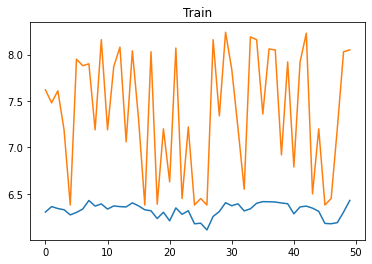

2/2 [==============================] - 3s 9ms/step


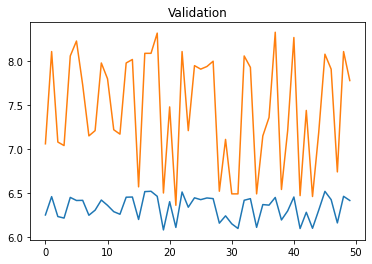

3/3 [==============================] - 0s 5ms/step


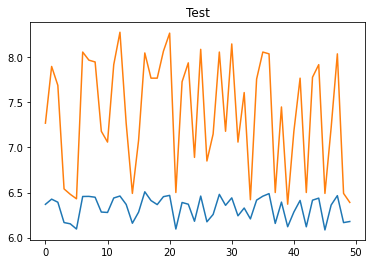

3/3 [==============================] - 0s 5ms/step


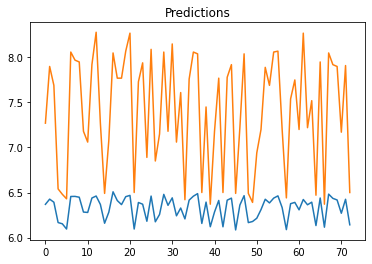

In [35]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [36]:
mavg_auto_lstm_mse

1.391937436978957

# Hybrid

## General

### CNN LSTM

In [37]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 51.3923 - root_mean_squared_error: 7.1688

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 150s 15s/step - loss: 51.3923 - root_mean_squared_error: 7.1688 - val_loss: 49.0012 - val_root_mean_squared_error: 7.0001
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 47.7271 - root_mean_squared_error: 6.9085

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 95s 13s/step - loss: 47.7271 - root_mean_squared_error: 6.9085 - val_loss: 44.4811 - val_root_mean_squared_error: 6.6694
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 43.2535 - root_mean_squared_error: 6.5767

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 43.2214 - root_mean_squared_error: 6.5743 - val_loss: 40.5545 - val_root_mean_squared_error: 6.3682
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 40.2401 - root_mean_squared_error: 6.3435

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 13s/step - loss: 40.2401 - root_mean_squared_error: 6.3435 - val_loss: 38.4527 - val_root_mean_squared_error: 6.2010
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 38.4211 - root_mean_squared_error: 6.1985

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 38.4211 - root_mean_squared_error: 6.1985 - val_loss: 36.7986 - val_root_mean_squared_error: 6.0662
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 36.7632 - root_mean_squared_error: 6.0633

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 100s 14s/step - loss: 36.7632 - root_mean_squared_error: 6.0633 - val_loss: 35.1519 - val_root_mean_squared_error: 5.9289
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 35.0438 - root_mean_squared_error: 5.9198

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 35.1013 - root_mean_squared_error: 5.9246 - val_loss: 33.5158 - val_root_mean_squared_error: 5.7893
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 33.4495 - root_mean_squared_error: 5.7836

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 14s/step - loss: 33.4495 - root_mean_squared_error: 5.7836 - val_loss: 31.8771 - val_root_mean_squared_error: 5.6460
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 31.8010 - root_mean_squared_error: 5.6392

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 15s/step - loss: 31.8010 - root_mean_squared_error: 5.6392 - val_loss: 30.2441 - val_root_mean_squared_error: 5.4995
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 30.1473 - root_mean_squared_error: 5.4907

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 14s/step - loss: 30.1473 - root_mean_squared_error: 5.4907 - val_loss: 28.6239 - val_root_mean_squared_error: 5.3501
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 28.5056 - root_mean_squared_error: 5.3391

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 120s 17s/step - loss: 28.5056 - root_mean_squared_error: 5.3391 - val_loss: 26.9569 - val_root_mean_squared_error: 5.1920
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 26.8538 - root_mean_squared_error: 5.1821

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 26.8538 - root_mean_squared_error: 5.1821 - val_loss: 25.4177 - val_root_mean_squared_error: 5.0416
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 25.3089 - root_mean_squared_error: 5.0308

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 112s 16s/step - loss: 25.3390 - root_mean_squared_error: 5.0338 - val_loss: 23.9421 - val_root_mean_squared_error: 4.8931
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 23.9203 - root_mean_squared_error: 4.8908

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 15s/step - loss: 23.8956 - root_mean_squared_error: 4.8883 - val_loss: 22.5390 - val_root_mean_squared_error: 4.7475
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 22.4942 - root_mean_squared_error: 4.7428

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 140s 19s/step - loss: 22.4942 - root_mean_squared_error: 4.7428 - val_loss: 21.1933 - val_root_mean_squared_error: 4.6036
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 21.1667 - root_mean_squared_error: 4.6007

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 21.1667 - root_mean_squared_error: 4.6007 - val_loss: 19.9428 - val_root_mean_squared_error: 4.4657
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 19.9147 - root_mean_squared_error: 4.4626

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 147s 20s/step - loss: 19.9147 - root_mean_squared_error: 4.4626 - val_loss: 18.7639 - val_root_mean_squared_error: 4.3317
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 18.7588 - root_mean_squared_error: 4.3311

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 18.7588 - root_mean_squared_error: 4.3311 - val_loss: 17.6788 - val_root_mean_squared_error: 4.2046
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 17.6940 - root_mean_squared_error: 4.2064

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 125s 18s/step - loss: 17.6940 - root_mean_squared_error: 4.2064 - val_loss: 16.6731 - val_root_mean_squared_error: 4.0833
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 16.7558 - root_mean_squared_error: 4.0934

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 98s 14s/step - loss: 16.7075 - root_mean_squared_error: 4.0875 - val_loss: 15.7436 - val_root_mean_squared_error: 3.9678
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 15.8669 - root_mean_squared_error: 3.9833

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 16s/step - loss: 15.7963 - root_mean_squared_error: 3.9745 - val_loss: 14.8869 - val_root_mean_squared_error: 3.8584
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 14.9538 - root_mean_squared_error: 3.8670

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 107s 15s/step - loss: 14.9538 - root_mean_squared_error: 3.8670 - val_loss: 14.0926 - val_root_mean_squared_error: 3.7540
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 14.1722 - root_mean_squared_error: 3.7646

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 97s 14s/step - loss: 14.1722 - root_mean_squared_error: 3.7646 - val_loss: 13.3521 - val_root_mean_squared_error: 3.6540
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 13.4399 - root_mean_squared_error: 3.6660

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 130s 19s/step - loss: 13.4399 - root_mean_squared_error: 3.6660 - val_loss: 12.6647 - val_root_mean_squared_error: 3.5587
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 12.7581 - root_mean_squared_error: 3.5718

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 96s 14s/step - loss: 12.7581 - root_mean_squared_error: 3.5718 - val_loss: 12.0202 - val_root_mean_squared_error: 3.4670
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 12.1145 - root_mean_squared_error: 3.4806

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 127s 18s/step - loss: 12.1145 - root_mean_squared_error: 3.4806 - val_loss: 11.4141 - val_root_mean_squared_error: 3.3785
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 11.5155 - root_mean_squared_error: 3.3935

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 11.5155 - root_mean_squared_error: 3.3935 - val_loss: 10.8450 - val_root_mean_squared_error: 3.2932
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 10.9507 - root_mean_squared_error: 3.3092

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 118s 17s/step - loss: 10.9507 - root_mean_squared_error: 3.3092 - val_loss: 10.3111 - val_root_mean_squared_error: 3.2111
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 10.4186 - root_mean_squared_error: 3.2278

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 111s 16s/step - loss: 10.4186 - root_mean_squared_error: 3.2278 - val_loss: 9.8075 - val_root_mean_squared_error: 3.1317
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 9.9185 - root_mean_squared_error: 3.1494

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 110s 16s/step - loss: 9.9171 - root_mean_squared_error: 3.1491 - val_loss: 9.3329 - val_root_mean_squared_error: 3.0550
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 9.4317 - root_mean_squared_error: 3.0711

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 143s 20s/step - loss: 9.4472 - root_mean_squared_error: 3.0736 - val_loss: 8.8843 - val_root_mean_squared_error: 2.9807
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 8.9727 - root_mean_squared_error: 2.9954

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 103s 15s/step - loss: 9.0016 - root_mean_squared_error: 3.0003 - val_loss: 8.4608 - val_root_mean_squared_error: 2.9088
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 8.5798 - root_mean_squared_error: 2.9291

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 133s 19s/step - loss: 8.5798 - root_mean_squared_error: 2.9291 - val_loss: 8.0611 - val_root_mean_squared_error: 2.8392
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 8.1825 - root_mean_squared_error: 2.8605

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 100s 14s/step - loss: 8.1825 - root_mean_squared_error: 2.8605 - val_loss: 7.6833 - val_root_mean_squared_error: 2.7719
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 7.8069 - root_mean_squared_error: 2.7941

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 140s 20s/step - loss: 7.8069 - root_mean_squared_error: 2.7941 - val_loss: 7.3300 - val_root_mean_squared_error: 2.7074
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 7.4555 - root_mean_squared_error: 2.7305

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 109s 16s/step - loss: 7.4516 - root_mean_squared_error: 2.7298 - val_loss: 6.9953 - val_root_mean_squared_error: 2.6449
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 7.1473 - root_mean_squared_error: 2.6734

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 101s 14s/step - loss: 7.1194 - root_mean_squared_error: 2.6682 - val_loss: 6.6773 - val_root_mean_squared_error: 2.5840
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 6.8027 - root_mean_squared_error: 2.6082

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 121s 17s/step - loss: 6.8027 - root_mean_squared_error: 2.6082 - val_loss: 6.3772 - val_root_mean_squared_error: 2.5253
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 6.5048 - root_mean_squared_error: 2.5505

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 105s 15s/step - loss: 6.5048 - root_mean_squared_error: 2.5505 - val_loss: 6.0932 - val_root_mean_squared_error: 2.4684
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 6.2181 - root_mean_squared_error: 2.4936

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 220s 31s/step - loss: 6.2181 - root_mean_squared_error: 2.4936 - val_loss: 5.8241 - val_root_mean_squared_error: 2.4133
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 5.9475 - root_mean_squared_error: 2.4387

KeyboardInterrupt: 

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")

In [ ]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)